Bienvenue au sein de ce Jupyter Notebook dédié au projet numéro 5 du parcours de Data Scientist, nommé "Segmentez des clients d'un site e-commerce".

Au sein de cette troisième étape, je vais vous présenter les différents essais que j'ai réalisé pour créer un algorithme de segmentation de clients pour l'entreprise Olist. Ces essais comporteront notamment l'utilisation des algorithmes KMeans, DBSCAN ou encore le CAH.

## Import des données et création des dataframes

In [1]:
import pandas as pd
df_customer = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_geolocation_dataset.csv')
df_order_item = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_payments_dataset.csv')
df_order_review = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/olist_sellers_dataset.csv')
df_product_category = pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/archive (42)/product_category_name_translation.csv')


In [10]:
df_final_merged_4=pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/Données/df_final_merged_4.csv')
df_final_merged_5=pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/Données/df_final_merged_5.csv')
df_final_merged_6=pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/Données/df_final_merged_6.csv')
df_final_merged_7=pd.read_csv('/content/drive/MyDrive/Projet 5 : Segmentez des clients dun site e-commerce/Données/df_final_merged_7.csv')


## Élaboration d'un modèle de clustering


### Premier Test

In [12]:
df_final_merged_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112650 non-null  object 
 1   customer_unique_id             112650 non-null  object 
 2   customer_zip_code_prefix       112650 non-null  int64  
 3   customer_city                  112650 non-null  object 
 4   customer_state                 112650 non-null  object 
 5   order_id                       112650 non-null  object 
 6   order_status                   112650 non-null  object 
 7   order_purchase_timestamp       112650 non-null  object 
 8   order_approved_at              112635 non-null  object 
 9   order_delivered_carrier_date   111456 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  112650 non-null  object 
 12  order_item_id                 

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supposons que votre DataFrame est nommé df_final_merged_4
# et qu'il contient les colonnes mentionnées.

# 1. Sélectionner les colonnes pour le clustering
X = df_final_merged_4[['Somme des achats', 'days_diff', 'Nombre achats effectués']]

# 2. Mettre à l'échelle les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Créer un modèle KMeans
# (vous devrez peut-être expérimenter avec le nombre de clusters - n_clusters)
kmeans = KMeans(n_clusters=4, random_state=0)

# 4. Ajuster le modèle aux données mises à l'échelle
kmeans.fit(X_scaled)

# 5. Obtenir les étiquettes de cluster
labels = kmeans.labels_

# 6. Ajouter les étiquettes de cluster au DataFrame original
df_final_merged_4['cluster'] = labels

In [13]:
df_final_merged_4[['Somme des achats', 'days_diff', 'Nombre achats effectués','cluster','Fréquence et Montant']]

Somme des achats  days_diff  Nombre achats effectués  cluster  \
0                 124.99        474                        1        1   
1                 289.00        233                        1        0   
2                 139.94        106                        1        0   
3                 149.94        173                        1        0   
4                 230.00         35                        1        0   
...                  ...        ...                      ...      ...   
112645             74.90        148                        1        0   
112646            114.90        152                        1        0   
112647             37.00        147                        1        0   
112648            689.00        303                        1        1   
112649             13.99        257                        1        0   

        Fréquence et Montant  
0                        3.0  
1                        4.5  
2                        3.5  
3                        3.5  
4                        4.0  
...                      ...  
112645                   2.0  
112646                   3.0  
112647                   0.5  
112648                   4.5  
112649                   0.0  

[112650 rows x 5 columns]

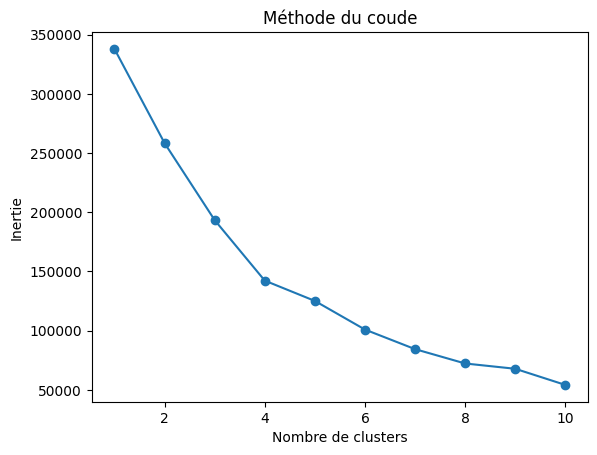

In [15]:
import matplotlib.pyplot as plt

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

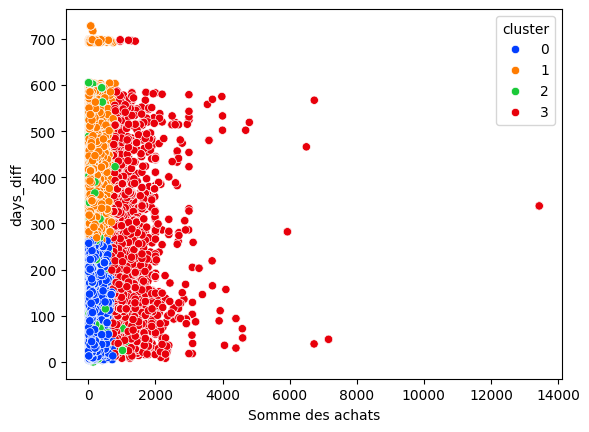

In [16]:
import seaborn as sns

# Créer le scatterplot
sns.scatterplot(x='Somme des achats', y='days_diff', hue='cluster', data=df_final_merged_4, palette='bright')
plt.show()

In [17]:
df_final_merged_4['cluster'].value_counts()

cluster
0    59317
1    43171
2     7399
3     2763
Name: count, dtype: int64

Avec LabelEncoder sur les variables catégorielles 'seller_state' et 'Catégorie de produit' et StandardScaler pour les autres variables numériques :

<ipython-input-18-3cba551e2e25>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-18-3cba551e2e25>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-18-3cba551e2e25>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

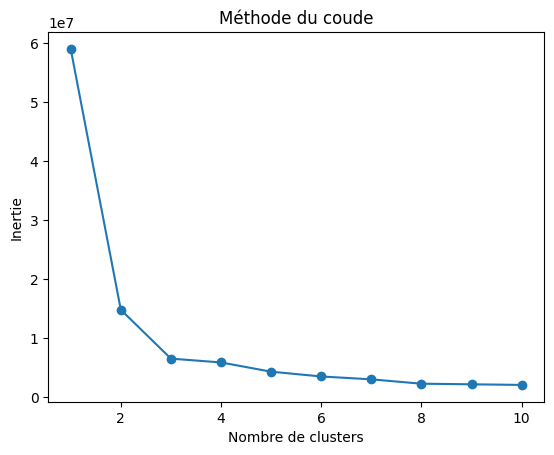

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Préparation des données

# Sélectionner les colonnes pertinentes
features = ['seller_city', 'seller_state', 'Catégorie de produit', 'Nombre achats effectués', 'price']
X = df_final_merged_6[features]
# 1. Sélectionner les colonnes pour le clustering
X = df_final_merged_6[['Somme des achats', 'days_diff', 'Nombre achats effectués','Catégorie de produit','seller_state']]

# Encoder les variables catégorielles
for col in ['seller_state', 'Catégorie de produit']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Standardiser les données numériques
scaler = StandardScaler()
X[['Somme des achats', 'days_diff', 'Nombre achats effectués']] = scaler.fit_transform(X[['Somme des achats', 'days_diff', 'Nombre achats effectués']])

# 2. Détermination du nombre optimal de clusters

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

# 3. Application de KMeans avec le nombre optimal de clusters

# Instancier le modèle KMeans avec le nombre optimal de clusters (par exemple, k=3)
kmeans = KMeans(n_clusters=4, random_state=42)

# Entraîner le modèle sur les données
kmeans.fit(X)

# 4. Attribution des groupes de clients

# Ajouter la colonne 'Groupe_KMeans' au DataFrame
df_final_merged_6['Groupe_KMeans'] = kmeans.labels_

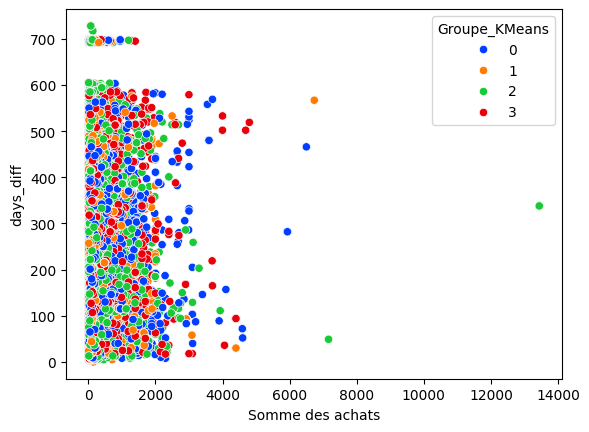

In [19]:
# Créer le scatterplot
sns.scatterplot(x='Somme des achats', y='days_diff', hue='Groupe_KMeans', data=df_final_merged_6, palette='bright')
plt.show()

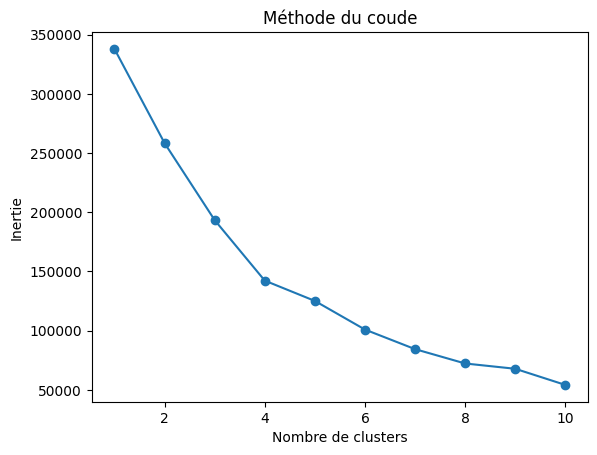

In [20]:
# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [21]:
df_final_merged_6['Groupe_KMeans'].value_counts()

Groupe_KMeans
2    37533
0    35783
3    26475
1    10959
Name: count, dtype: int64

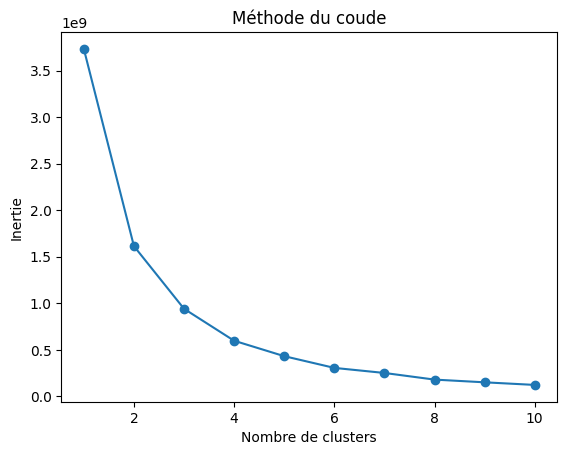

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Préparation des données

# Sélectionner les colonnes pertinentes
features = ['Nombre achats effectués', 'price']
X = df_final_merged_5[features]

# # Encoder les variables catégorielles
# for col in ['seller_city', 'seller_state', 'Catégorie de produit']:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col])

# # Standardiser les données numériques
# scaler = StandardScaler()
# X[['Nombre achats effectués', 'price']] = scaler.fit_transform(X[['Nombre achats effectués', 'price']])

# 2. Détermination du nombre optimal de clusters

# Utiliser la méthode du coude pour trouver le nombre optimal de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracer le graphique du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

# 3. Application de KMeans avec le nombre optimal de clusters

# Instancier le modèle KMeans avec le nombre optimal de clusters (par exemple, k=3)
kmeans = KMeans(n_clusters=9, random_state=42)

# Entraîner le modèle sur les données
kmeans.fit(X)

# 4. Attribution des groupes de clients

# Ajouter la colonne 'Groupe_KMeans' au DataFrame
df_final_merged_5['Groupe_KMeans'] = kmeans.labels_

<Axes: xlabel='decile_days_diff', ylabel='Fréquence et Montant'>

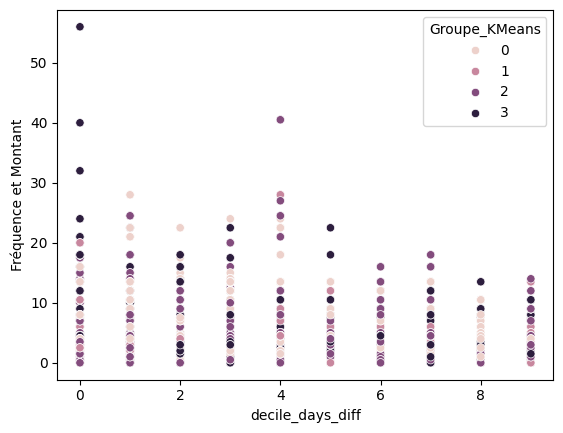

In [23]:
sns.scatterplot(x='decile_days_diff',y='Fréquence et Montant',data=df_final_merged_6,hue='Groupe_KMeans')

### Deuxième Test

En utilisant la Standardisation et 8 variables :
- 'price',
- 'Somme des achats',
- 'Nombre achats effectués',
- 'Number_of_days_of_delay',
- 'days_diff',
- 'review_score',
- 'payment_installments'
- 'freight_value

In [24]:
df_final_merged_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  order_item_id                 

**Visualisations des distributions**

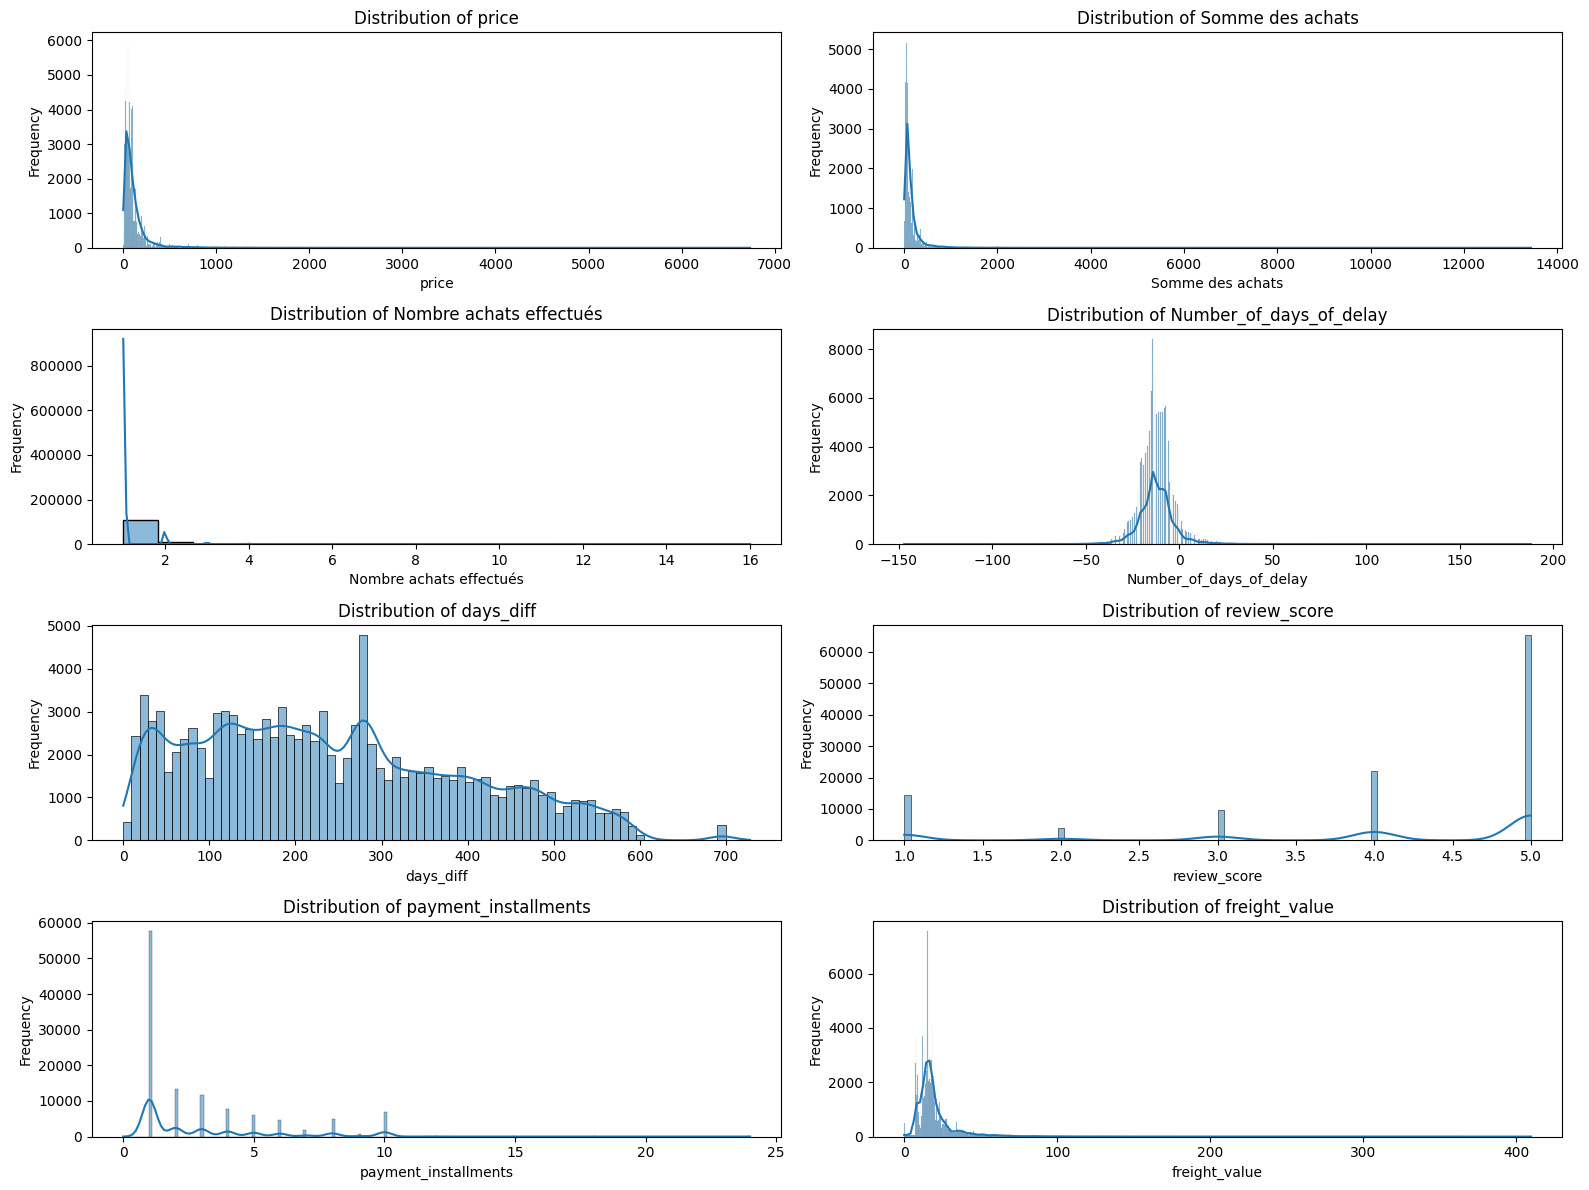

In [25]:
variables = ['price','Somme des achats','Nombre achats effectués', 'Number_of_days_of_delay',
             'days_diff','review_score','payment_installments','freight_value']

plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_final_merged_7[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
#Application de la fonction logarithmique sur les variables non-normales
import numpy as np

df_log = df_final_merged_7.copy()
columns_to_log = ['price', 'Somme des achats', 'Nombre achats effectués']

for column in columns_to_log:
    if column in df_log.columns:
        df_log[column] = np.log10(df_log[column])

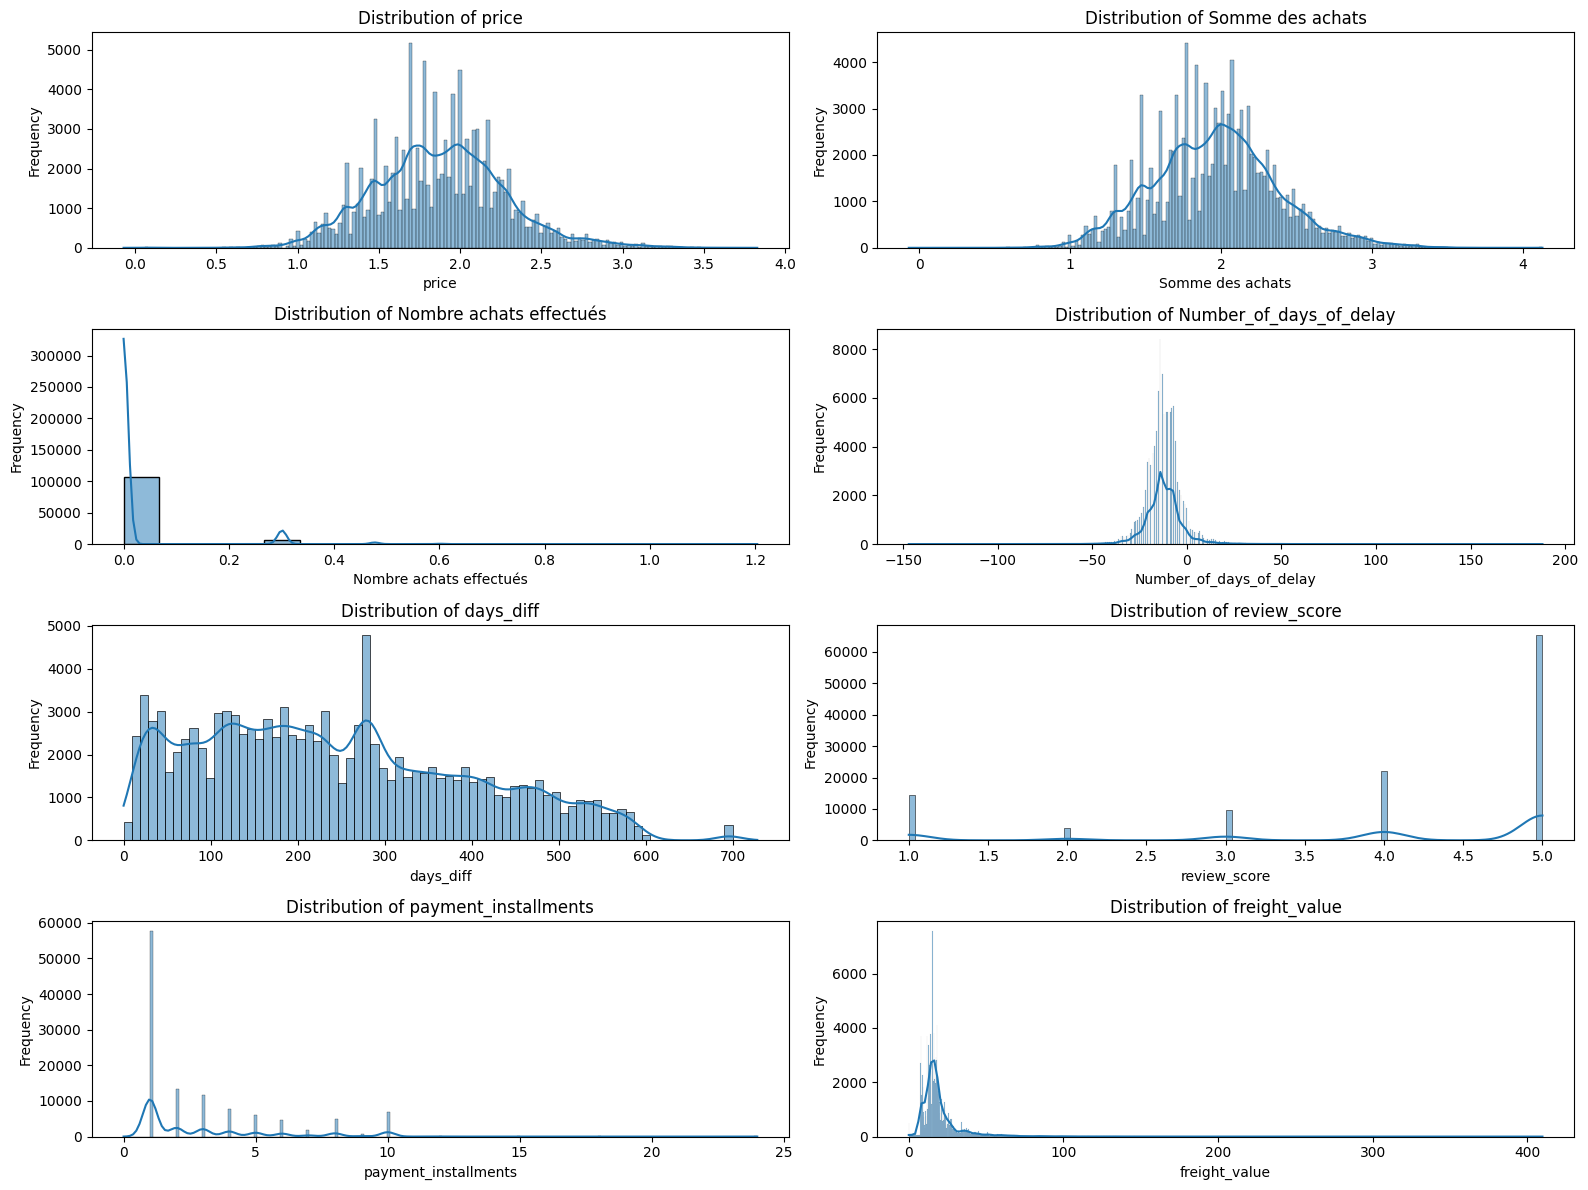

In [27]:
#Seconde visualisation après les transformations logarithmiques
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_log[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
df_log_filtered=df_log.loc[:,['customer_unique_id','price', 'freight_value','Somme des achats','Nombre achats effectués','days_diff',
                              'Number_of_days_of_delay','review_score','payment_installments']]
df_log_filtered.head()

customer_unique_id     price  freight_value  \
0  861eff4711a542e4b93843c6dd7febb0  2.096875          21.88   
1  290c77bc529b7ac935b93aa66c333dc3  2.460898          46.48   
2  060e732b5b29e8181a18229c7b0b2b5e  2.145942          17.79   
3  259dac757896d24d7702b9acbbff3f3c  2.175918          23.36   
4  345ecd01c38d18a9036ed96c73b8d066  2.361728          22.25   

   Somme des achats  Nombre achats effectués  days_diff  \
0          2.096875                      0.0        474   
1          2.460898                      0.0        233   
2          2.145942                      0.0        106   
3          2.175918                      0.0        173   
4          2.361728                      0.0         35   

   Number_of_days_of_delay  review_score  payment_installments  
0                    -11.0             4                     2  
1                     -8.0             5                     8  
2                      1.0             5                     7  
3                    -13.0             5                     1  
4                     -6.0             5                     8

In [29]:
from sklearn.preprocessing import StandardScaler

df_log_bis=df_log_filtered.copy()
scaler = StandardScaler()
df_log_bis.set_index("customer_unique_id", inplace=True)

df_log_bis.info()
df_log_bis.head()

<class 'pandas.core.frame.DataFrame'>
Index: 115609 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    115609 non-null  float64
 1   freight_value            115609 non-null  float64
 2   Somme des achats         115609 non-null  float64
 3   Nombre achats effectués  115609 non-null  float64
 4   days_diff                115609 non-null  int64  
 5   Number_of_days_of_delay  113209 non-null  float64
 6   review_score             115609 non-null  int64  
 7   payment_installments     115609 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 7.9+ MB


price  freight_value  Somme des achats  \
customer_unique_id                                                            
861eff4711a542e4b93843c6dd7febb0  2.096875          21.88          2.096875   
290c77bc529b7ac935b93aa66c333dc3  2.460898          46.48          2.460898   
060e732b5b29e8181a18229c7b0b2b5e  2.145942          17.79          2.145942   
259dac757896d24d7702b9acbbff3f3c  2.175918          23.36          2.175918   
345ecd01c38d18a9036ed96c73b8d066  2.361728          22.25          2.361728   

                                  Nombre achats effectués  days_diff  \
customer_unique_id                                                     
861eff4711a542e4b93843c6dd7febb0                      0.0        474   
290c77bc529b7ac935b93aa66c333dc3                      0.0        233   
060e732b5b29e8181a18229c7b0b2b5e                      0.0        106   
259dac757896d24d7702b9acbbff3f3c                      0.0        173   
345ecd01c38d18a9036ed96c73b8d066                      0.0         35   

                                  Number_of_days_of_delay  review_score  \
customer_unique_id                                                        
861eff4711a542e4b93843c6dd7febb0                    -11.0             4   
290c77bc529b7ac935b93aa66c333dc3                     -8.0             5   
060e732b5b29e8181a18229c7b0b2b5e                      1.0             5   
259dac757896d24d7702b9acbbff3f3c                    -13.0             5   
345ecd01c38d18a9036ed96c73b8d066                     -6.0             5   

                                  payment_installments  
customer_unique_id                                      
861eff4711a542e4b93843c6dd7febb0                     2  
290c77bc529b7ac935b93aa66c333dc3                     8  
060e732b5b29e8181a18229c7b0b2b5e                     7  
259dac757896d24d7702b9acbbff3f3c                     1  
345ecd01c38d18a9036ed96c73b8d066                     8

In [30]:
df_log_scaled = pd.DataFrame(scaler.fit_transform(df_log_bis), columns=df_log_bis.columns)


In [31]:
df_std_final = df_log_scaled.copy()
df_std_final = df_std_final.dropna(subset=['Number_of_days_of_delay'])
df_std_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113209 entries, 0 to 115608
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    113209 non-null  float64
 1   freight_value            113209 non-null  float64
 2   Somme des achats         113209 non-null  float64
 3   Nombre achats effectués  113209 non-null  float64
 4   days_diff                113209 non-null  float64
 5   Number_of_days_of_delay  113209 non-null  float64
 6   review_score             113209 non-null  float64
 7   payment_installments     113209 non-null  float64
dtypes: float64(8)
memory usage: 7.8 MB


**>>>>>**






**Détermination du nombre optimal de clusters**







**<<<<<<<**

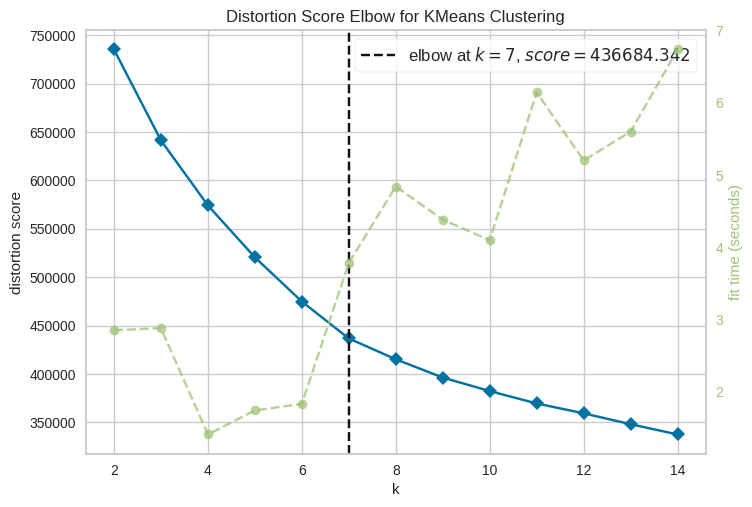

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


kmeans_model = KMeans(random_state=42, n_init=10)
elbow = KElbowVisualizer(kmeans_model, k=(2,15))

elbow.fit(df_std_final)
elbow.poof()

Nombre de clusters optimal semble être de 7.

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_7.fit(df_std_final)

KMeans(n_clusters=7, n_init=10, random_state=42)

In [34]:
df_std_final['cluster_7']= kmeans_7.labels_
df_std_final.head()

price  freight_value  Somme des achats  Nombre achats effectués  \
0  0.552922       0.115124          0.322325                -0.266884   
1  1.459203       1.668535          1.200094                -0.266884   
2  0.675079      -0.143146          0.440639                -0.266884   
3  0.749707       0.208581          0.512920                -0.266884   
4  1.212306       0.138489          0.960965                -0.266884   

   days_diff  Number_of_days_of_delay  review_score  payment_installments  \
0   1.512000                 0.108253     -0.024834             -0.340240   
1  -0.061751                 0.405554      0.696887              1.817199   
2  -0.891072                 1.297458      0.696887              1.457626   
3  -0.453556                -0.089948      0.696887             -0.699813   
4  -1.354708                 0.603755      0.696887              1.817199   

   cluster_7  
0          2  
1          0  
2          0  
3          5  
4          0

- Test 0 avec toutes les variables présentes au sein du dataframe df_std_final

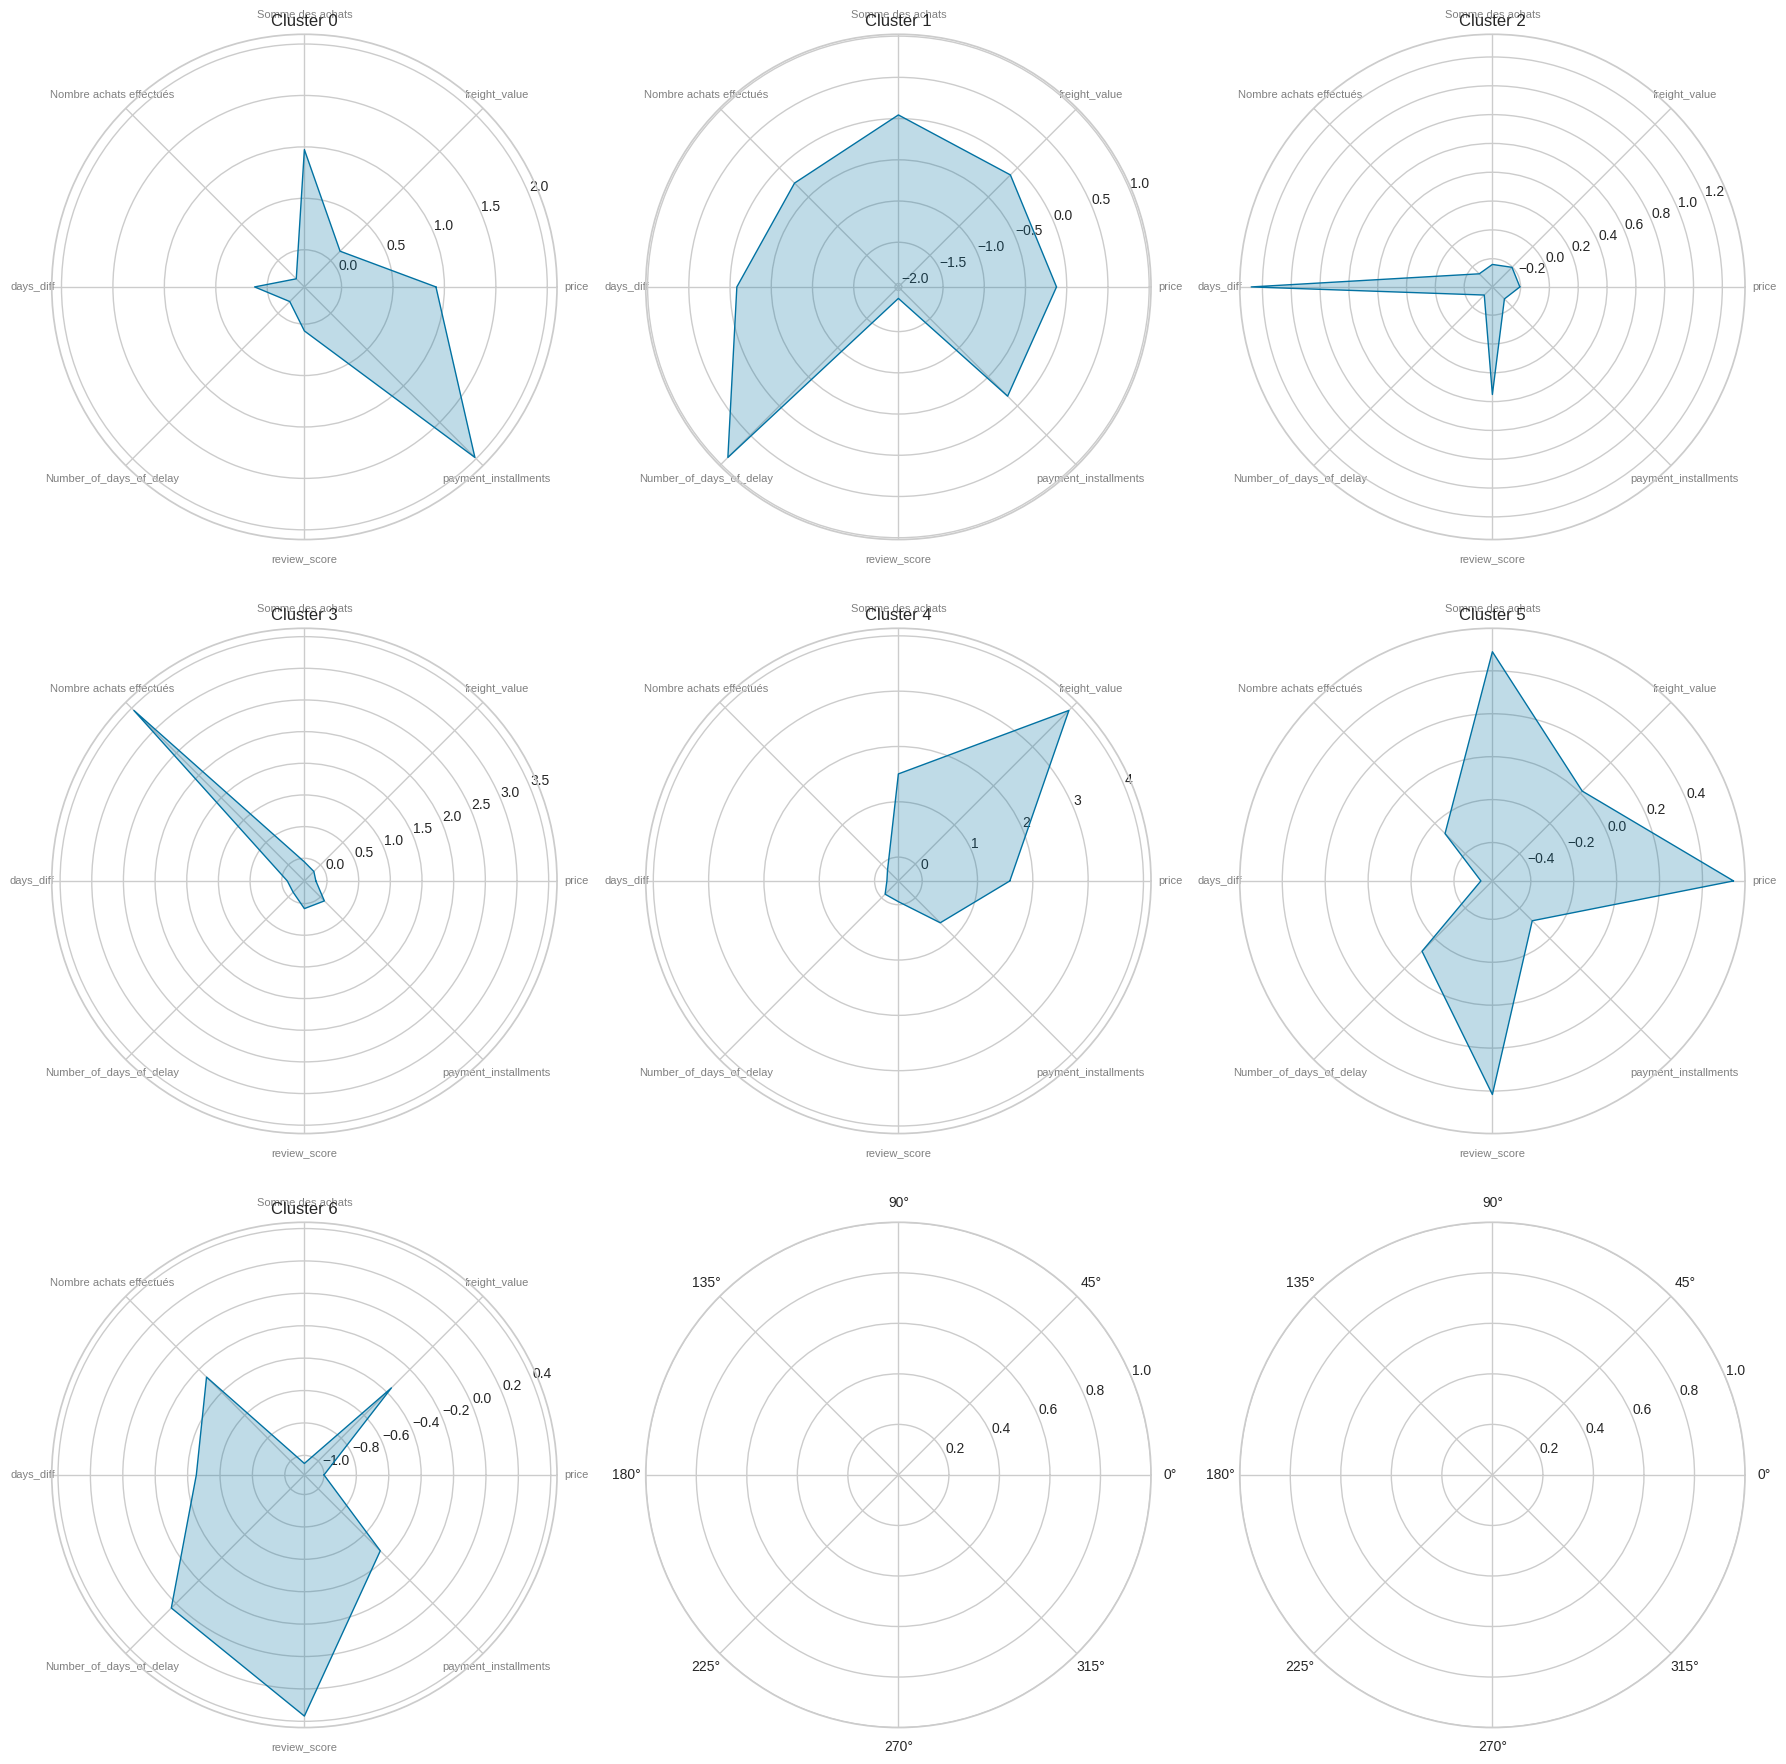

In [35]:
from math import pi

variables = ['price', 'freight_value','Somme des achats',
             'Nombre achats effectués','days_diff',
            'Number_of_days_of_delay','review_score','payment_installments']

cluster_means = df_std_final.groupby('cluster_7')[variables].mean().reset_index()

num_clusters = len(cluster_means)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 3, figsize=(18, 18), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_7').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means, variables)

- Test 1 : Colonnes Récence/Fréquence/Montant ('Somme des achats','Nombre achats effectués','days_diff' )

In [36]:
df_test_1 = df_std_final.loc[:,['Somme des achats','Nombre achats effectués','days_diff']]
display(df_test_1.head())

elbow.fit(df_test_1)
elbow.poof()

Somme des achats  Nombre achats effectués  days_diff
0          0.322325                -0.266884   1.512000
1          1.200094                -0.266884  -0.061751
2          0.440639                -0.266884  -0.891072
3          0.512920                -0.266884  -0.453556
4          0.960965                -0.266884  -1.354708

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

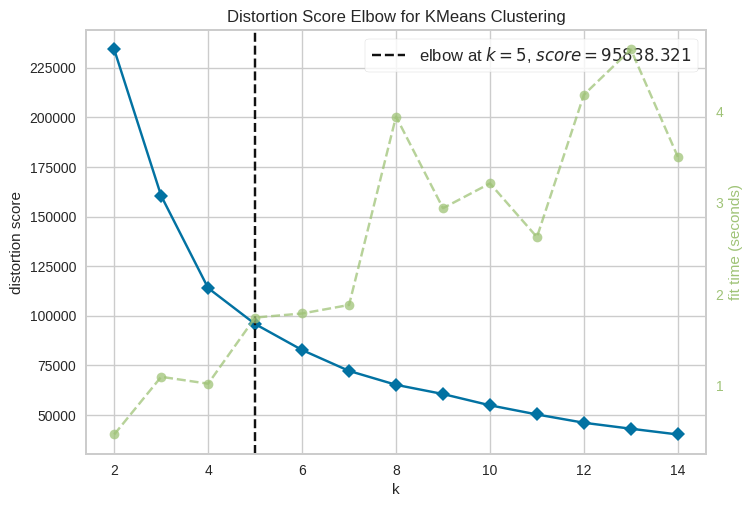

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
kmeans_model = KMeans(random_state=42, n_init=10)
elbow = KElbowVisualizer(kmeans_model, k=(2,15))

elbow.fit(df_test_1)
elbow.poof()

In [38]:
kmeans_test_1 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_test_1.fit(df_test_1)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [39]:
df_test_1['cluster_5']= kmeans_test_1.labels_
df_test_1.head()

Somme des achats  Nombre achats effectués  days_diff  cluster_5
0          0.322325                -0.266884   1.512000          0
1          1.200094                -0.266884  -0.061751          3
2          0.440639                -0.266884  -0.891072          3
3          0.512920                -0.266884  -0.453556          3
4          0.960965                -0.266884  -1.354708          3

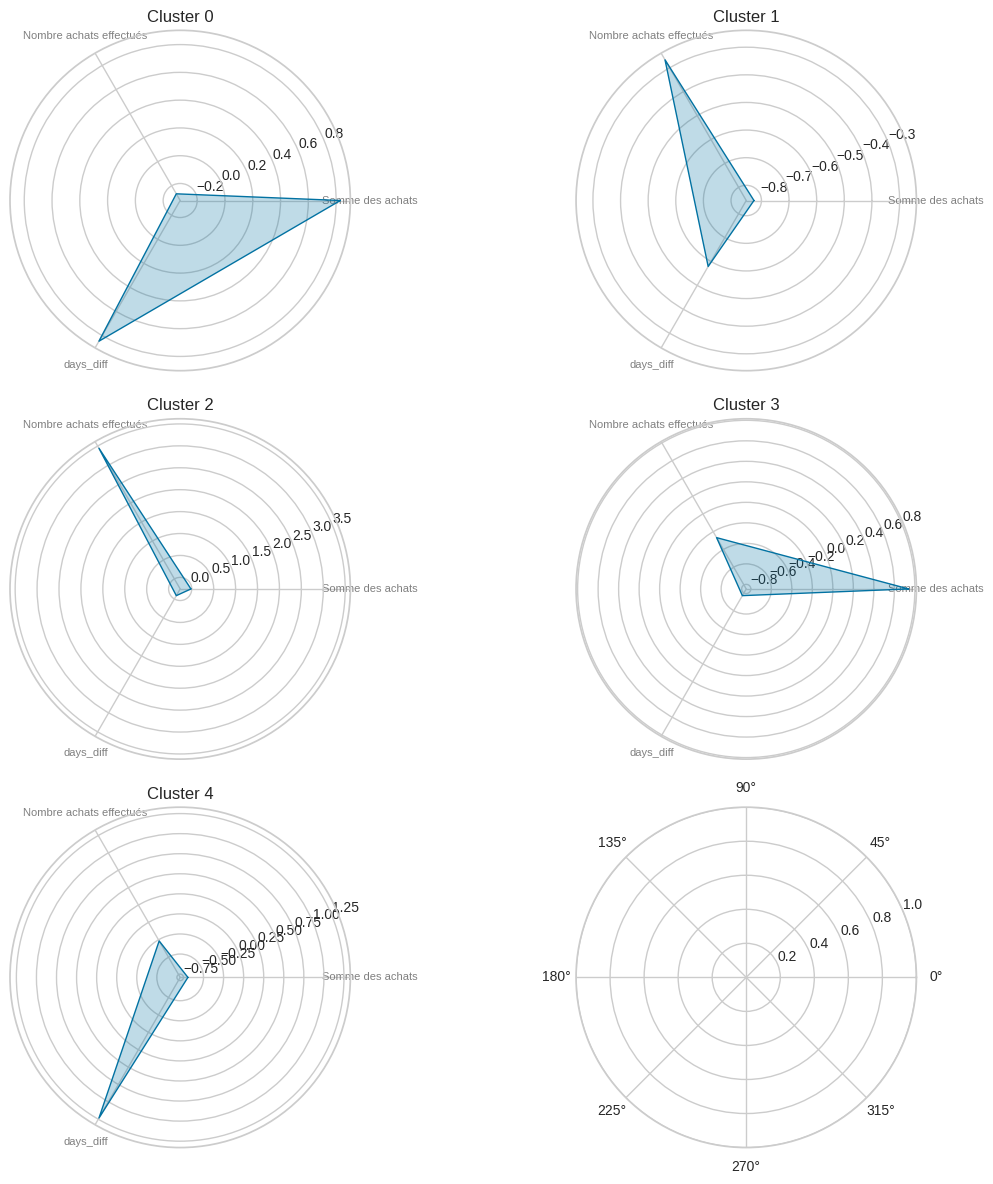

In [40]:
from math import pi

variables_test_1 = ['Somme des achats','Nombre achats effectués','days_diff']

cluster_means_test_1 = df_test_1.groupby('cluster_5')[variables_test_1].mean().reset_index()

num_clusters = len(cluster_means_test_1)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_5').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means_test_1, variables_test_1)

- Test 2 : Ajout de la colonne 'review_score'

In [41]:
df_test_2 = df_std_final.loc[:,['Somme des achats','Nombre achats effectués','days_diff','review_score']]
display(df_test_2.head())

elbow.fit(df_test_2)
elbow.poof()

Somme des achats  Nombre achats effectués  days_diff  review_score
0          0.322325                -0.266884   1.512000     -0.024834
1          1.200094                -0.266884  -0.061751      0.696887
2          0.440639                -0.266884  -0.891072      0.696887
3          0.512920                -0.266884  -0.453556      0.696887
4          0.960965                -0.266884  -1.354708      0.696887

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
df_test_2['review_score'].isnull().sum()


0

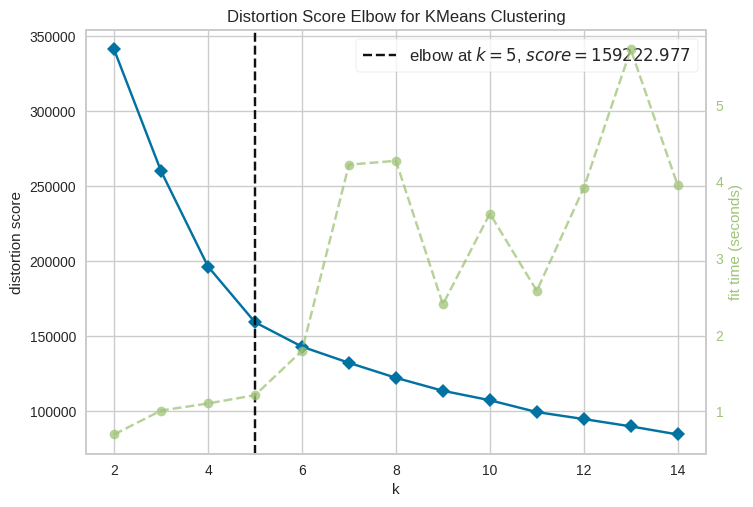

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
kmeans_test_2 = KMeans(random_state=42, n_init=10)
elbow = KElbowVisualizer(kmeans_test_2, k=(2,15))

elbow.fit(df_test_2)
elbow.poof()

In [44]:
kmeans_test_2 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_test_2.fit(df_test_2)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [45]:
df_test_2['cluster_5']= kmeans_test_2.labels_
df_test_2.head()

Somme des achats  Nombre achats effectués  days_diff  review_score  \
0          0.322325                -0.266884   1.512000     -0.024834   
1          1.200094                -0.266884  -0.061751      0.696887   
2          0.440639                -0.266884  -0.891072      0.696887   
3          0.512920                -0.266884  -0.453556      0.696887   
4          0.960965                -0.266884  -1.354708      0.696887   

   cluster_5  
0          2  
1          1  
2          1  
3          1  
4          1

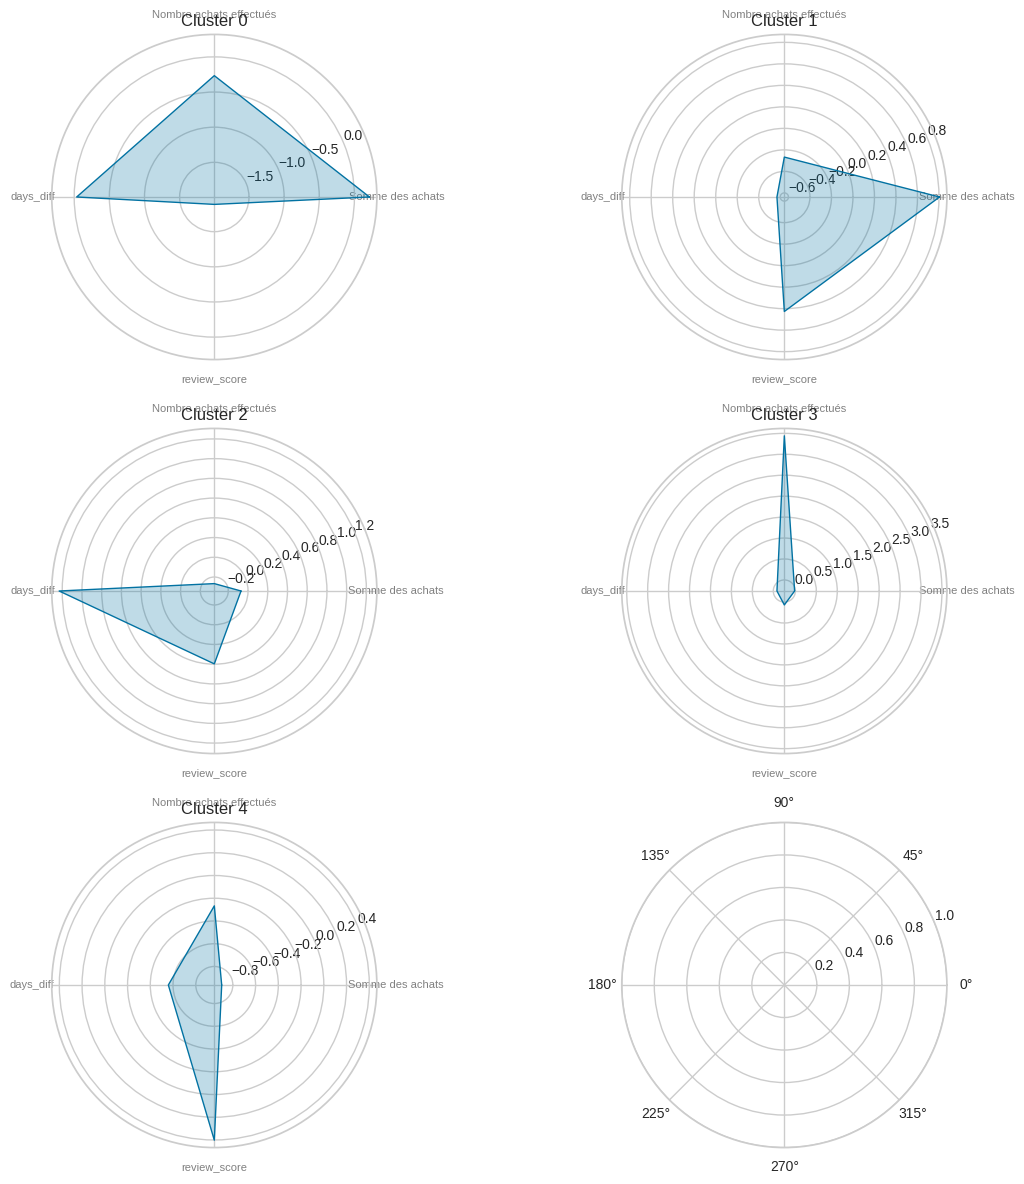

In [46]:
from math import pi

variables_test_2 = ['Somme des achats','Nombre achats effectués','days_diff','review_score']

cluster_means_test_2 = df_test_2.groupby('cluster_5')[variables_test_2].mean().reset_index()

num_clusters = len(cluster_means_test_2)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_5').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means_test_2, variables_test_2)

- Test 3 : Ajout de la colonne 'Number_of_days_of_delay'

In [47]:
df_test_3 = df_std_final.loc[:,['Somme des achats','Nombre achats effectués','days_diff','review_score','Number_of_days_of_delay']]
display(df_test_3.head())

elbow.fit(df_test_3)
elbow.poof()

Somme des achats  Nombre achats effectués  days_diff  review_score  \
0          0.322325                -0.266884   1.512000     -0.024834   
1          1.200094                -0.266884  -0.061751      0.696887   
2          0.440639                -0.266884  -0.891072      0.696887   
3          0.512920                -0.266884  -0.453556      0.696887   
4          0.960965                -0.266884  -1.354708      0.696887   

   Number_of_days_of_delay  
0                 0.108253  
1                 0.405554  
2                 1.297458  
3                -0.089948  
4                 0.603755

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

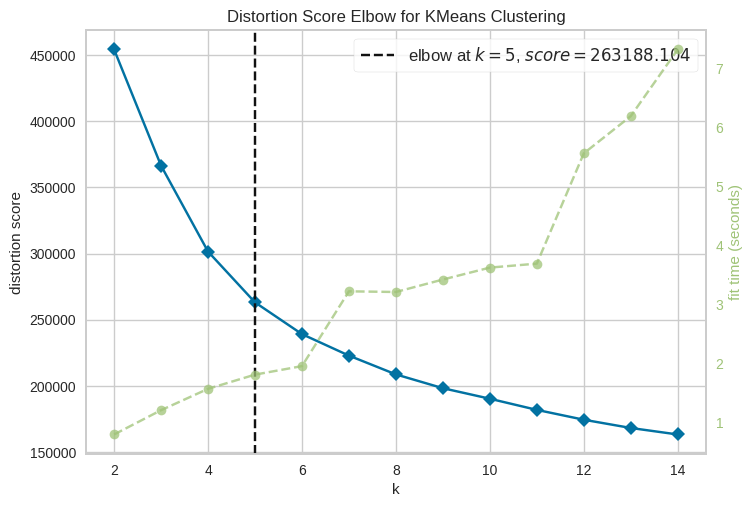

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans_test_3 = KMeans(random_state=42, n_init=10)
elbow = KElbowVisualizer(kmeans_test_3, k=(2,15))

elbow.fit(df_test_3)
elbow.poof()

In [49]:
kmeans_test_3 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_test_3.fit(df_test_3)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [50]:
df_test_3['cluster_5']= kmeans_test_3.labels_
df_test_3.head()

Somme des achats  Nombre achats effectués  days_diff  review_score  \
0          0.322325                -0.266884   1.512000     -0.024834   
1          1.200094                -0.266884  -0.061751      0.696887   
2          0.440639                -0.266884  -0.891072      0.696887   
3          0.512920                -0.266884  -0.453556      0.696887   
4          0.960965                -0.266884  -1.354708      0.696887   

   Number_of_days_of_delay  cluster_5  
0                 0.108253          2  
1                 0.405554          1  
2                 1.297458          1  
3                -0.089948          1  
4                 0.603755          1

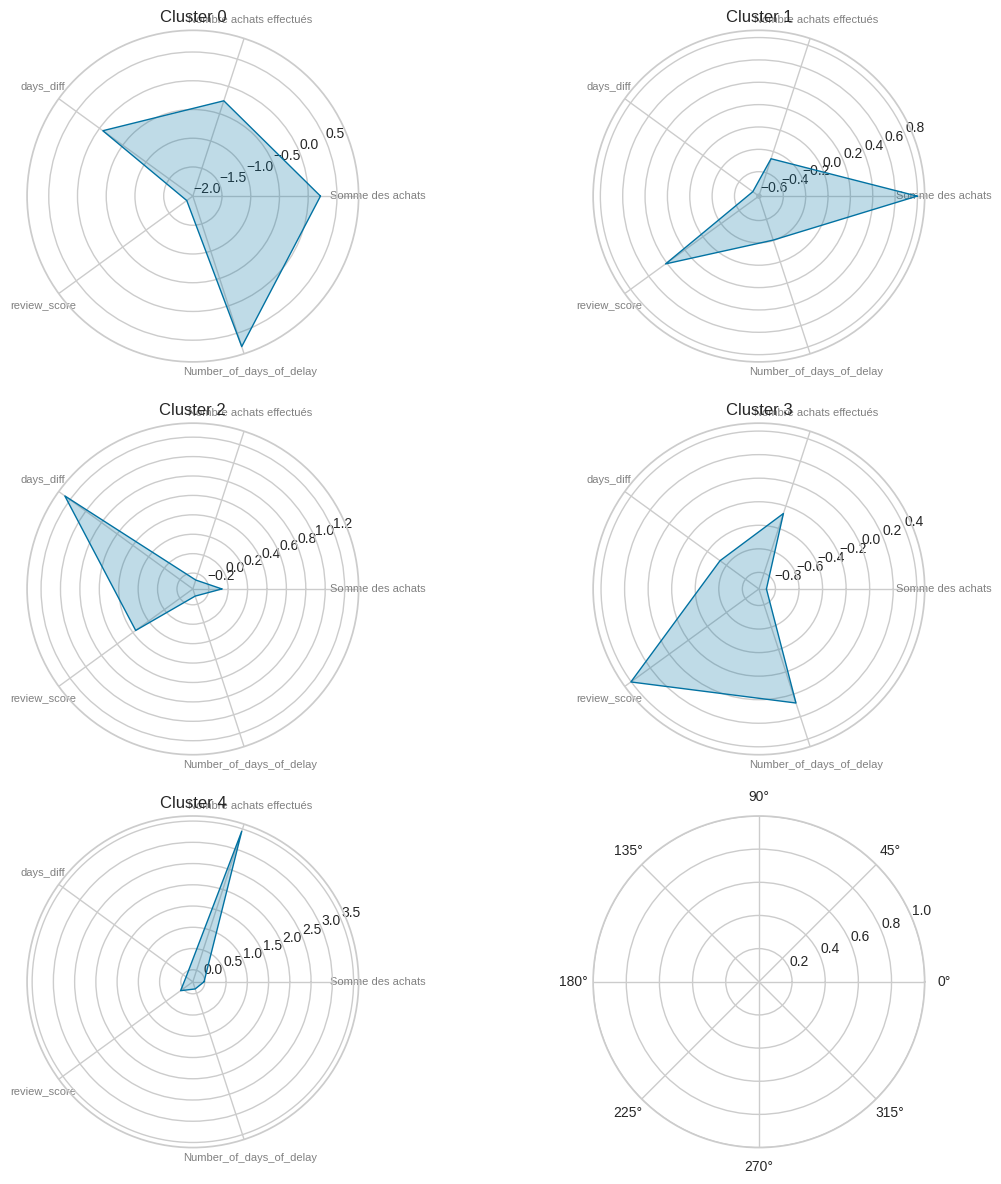

In [51]:
from math import pi

variables_test_3 = ['Somme des achats','Nombre achats effectués','days_diff','review_score','Number_of_days_of_delay']

cluster_means_test_3 = df_test_3.groupby('cluster_5')[variables_test_3].mean().reset_index()

num_clusters = len(cluster_means_test_3)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_5').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means_test_3, variables_test_3)

In [52]:
df_test_3['cluster_5'].value_counts()

cluster_5
1    30849
3    30356
2    27055
0    16799
4     8150
Name: count, dtype: int64

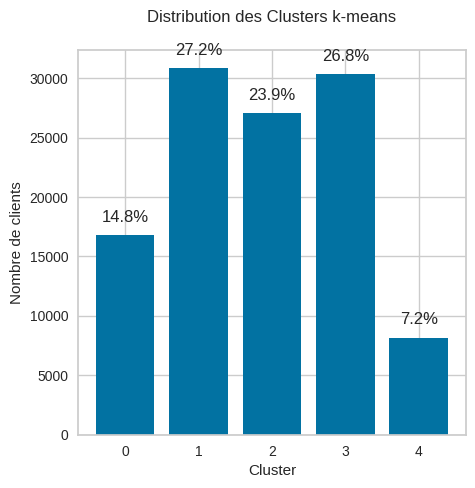

In [53]:
segment_counts = df_test_3['cluster_5'].value_counts()

# Sort segment_counts in descending order
segment_counts = segment_counts.sort_values(ascending=False)


plt.figure(figsize=(5,5))
plt.bar(segment_counts.index, segment_counts.values)

# Add percentages on top of the bars
total = segment_counts.sum()
for cluster, count in segment_counts.items():  # Iterate using items()
    percentage = '{:.1f}%'.format(100 * count / total)
    plt.text(cluster, count + 0.01 * total, percentage, ha='center')

plt.title('Distribution des Clusters k-means', pad=20)
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.show()

**CA par cluster**

In [54]:
clusters = df_test_3.copy()
clusters = clusters[['cluster_5']]

clusters = clusters.reset_index()
df_ca = df_final_merged_7.copy()
df_ca = df_ca.reset_index()

df_with_clusters = pd.merge(df_ca, clusters, left_index=True, right_index=True, how='inner')
# df_with_clusters = df_with_clusters.drop(columns=['index'])

df_with_clusters_ca = df_with_clusters.loc[:,['Somme des achats','cluster_5']]
df_with_clusters_ca

Somme des achats  cluster_5
0                 124.99          2
1                 289.00          1
2                 139.94          1
3                 149.94          1
4                 230.00          1
...                  ...        ...
113204            689.89          3
113205            155.06          1
113206             80.99          0
113207             65.00          1
113208            149.90          3

[113209 rows x 2 columns]

cluster_5
1    4678732.43
3    4612612.36
2    4134376.38
0    2582482.36
4    1215408.79
Name: Somme des achats, dtype: float64

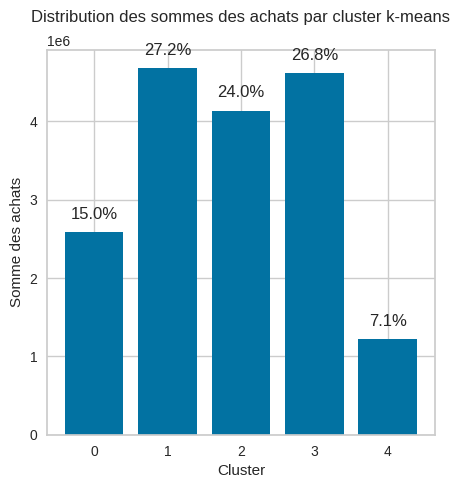

In [55]:
# Calculer la somme des achats pour chaque cluster
cluster_sums = df_with_clusters_ca.groupby('cluster_5')['Somme des achats'].sum()

# Trier cluster_sums par ordre décroissant
cluster_sums = cluster_sums.sort_values(ascending=False)
display(cluster_sums)

# Créer le graphique à barres
plt.figure(figsize=(5, 5))
plt.bar(cluster_sums.index, cluster_sums.values)

# Ajouter des pourcentages au-dessus des barres
total = cluster_sums.sum()
for cluster, total_achat in cluster_sums.items():
    percentage = '{:.1f}%'.format(100 * total_achat / total)
    plt.text(cluster, total_achat + 0.01 * total, percentage, ha='center')

# Ajouter un titre et des étiquettes d'axe
plt.title('Distribution des sommes des achats par cluster k-means', pad=20)
plt.xlabel('Cluster')
plt.ylabel('Somme des achats')

# Afficher le graphique
plt.show()

Avec 5 clusters, malgré le résultat donné par la méthode du coude, la segmentation ne semble pas être pertinente. Nous allons donc réaliser la segmentation avec un nombre de cluster égal à **6**.

In [56]:
df_test_3_bis=df_test_3.copy()
kmeans_test_3_bis = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_test_3_bis.fit(df_test_3)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [57]:
df_test_3_bis['cluster_6']= kmeans_test_3_bis.labels_
df_test_3_bis.head()

Somme des achats  Nombre achats effectués  days_diff  review_score  \
0          0.322325                -0.266884   1.512000     -0.024834   
1          1.200094                -0.266884  -0.061751      0.696887   
2          0.440639                -0.266884  -0.891072      0.696887   
3          0.512920                -0.266884  -0.453556      0.696887   
4          0.960965                -0.266884  -1.354708      0.696887   

   Number_of_days_of_delay  cluster_5  cluster_6  
0                 0.108253          2          3  
1                 0.405554          1          4  
2                 1.297458          1          4  
3                -0.089948          1          4  
4                 0.603755          1          4

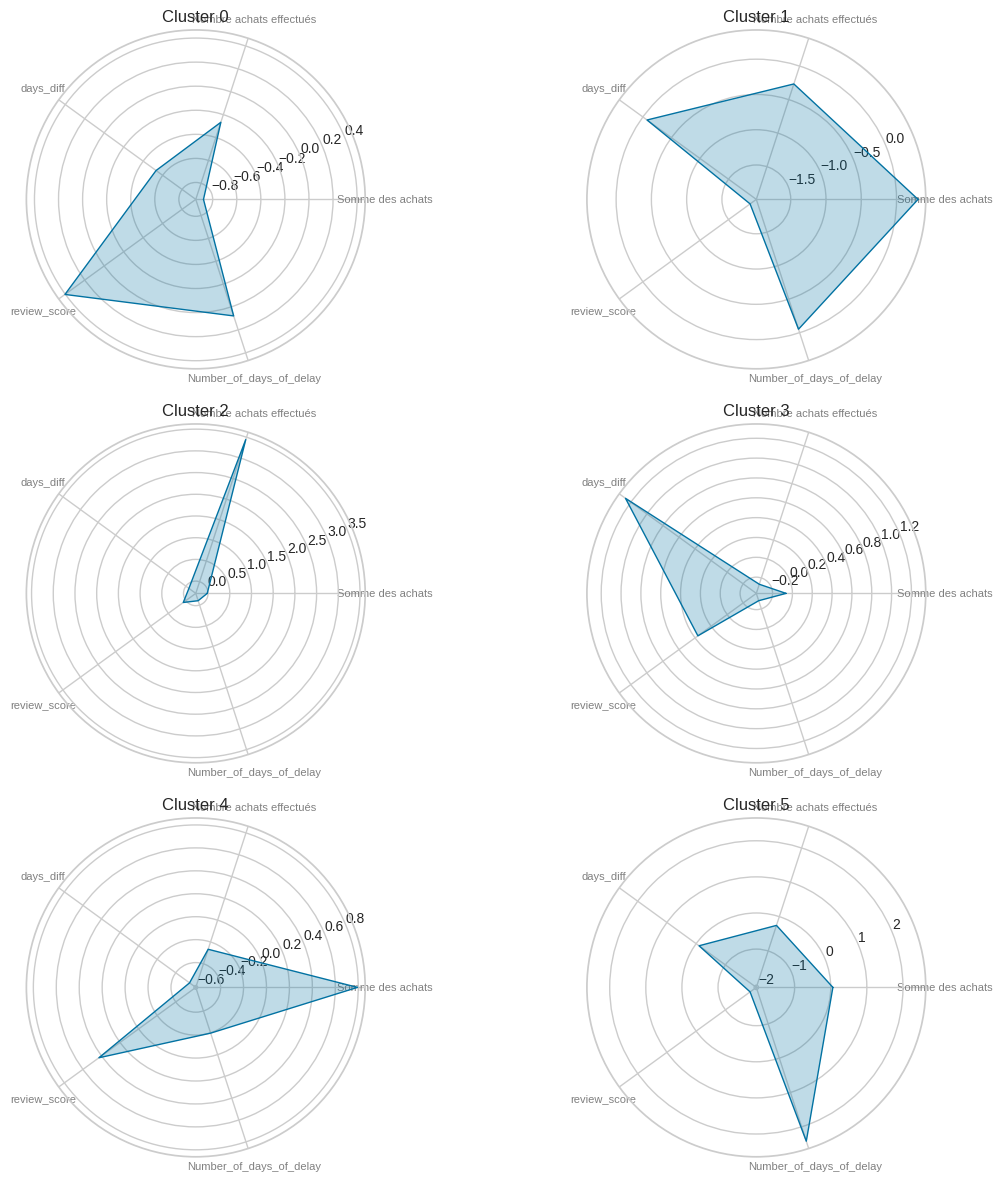

In [58]:
from math import pi

variables_test_3 = ['Somme des achats','Nombre achats effectués','days_diff','review_score','Number_of_days_of_delay']

cluster_means_test_3 = df_test_3_bis.groupby('cluster_6')[variables_test_3].mean().reset_index()

num_clusters = len(cluster_means_test_3)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_6').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means_test_3, variables_test_3)

**Nombre de clients par cluster**

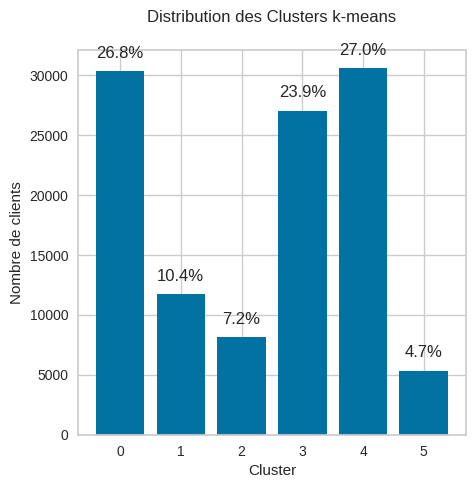

In [60]:
segment_counts_bis = df_test_3_bis['cluster_6'].value_counts()

# Sort segment_counts_bis in descending order
segment_counts_bis = segment_counts_bis.sort_values(ascending=False)


plt.figure(figsize=(5,5))
plt.bar(segment_counts_bis.index, segment_counts_bis.values)

# Add percentages on top of the bars
total = segment_counts_bis.sum()
for cluster, count in segment_counts_bis.items():  # Iterate using items()
    percentage = '{:.1f}%'.format(100 * count / total)
    plt.text(cluster, count + 0.01 * total, percentage, ha='center')

plt.title('Distribution des Clusters k-means', pad=20)
plt.xlabel('Cluster')
plt.ylabel('Nombre de clients')
plt.show()

**CA par Cluster de client**

In [61]:
clusters_bis = df_test_3_bis.copy()
clusters_bis = clusters_bis[['cluster_6']]

clusters_bis = clusters_bis.reset_index()
df_ca_bis = df_final_merged_7.copy()
df_ca_bis = df_ca_bis.reset_index()

df_with_clusters_bis = pd.merge(df_ca_bis, clusters_bis, left_index=True, right_index=True, how='inner')
# df_with_clusters = df_with_clusters.drop(columns=['index'])

df_with_clusters_ca_bis = df_with_clusters_bis.loc[:,['Somme des achats','cluster_6']]
df_with_clusters_ca_bis

Somme des achats  cluster_6
0                 124.99          3
1                 289.00          4
2                 139.94          4
3                 149.94          4
4                 230.00          4
...                  ...        ...
113204            689.89          0
113205            155.06          4
113206             80.99          5
113207             65.00          4
113208            149.90          0

[113209 rows x 2 columns]

cluster_6
4    4644818.63
0    4612463.37
3    4133819.38
1    1820314.48
2    1215408.79
5     796787.67
Name: Somme des achats, dtype: float64

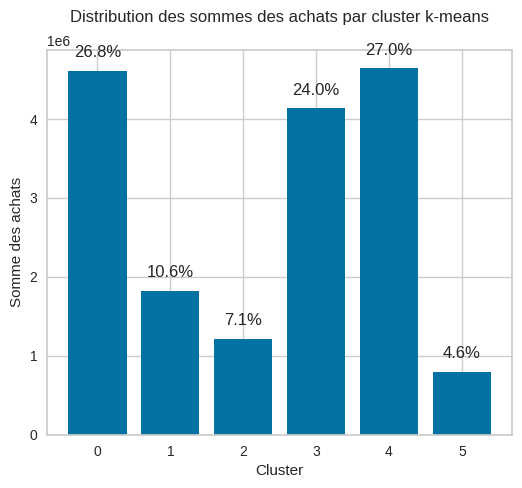

In [62]:
# Calculer la somme des achats pour chaque cluster
cluster_sums_bis = df_with_clusters_ca_bis.groupby('cluster_6')['Somme des achats'].sum()

# Trier cluster_sums par ordre décroissant
cluster_sums_bis = cluster_sums_bis.sort_values(ascending=False)
display(cluster_sums_bis)

# Créer le graphique à barres
plt.figure(figsize=(6, 5))
plt.bar(cluster_sums_bis.index, cluster_sums_bis.values)

# Ajouter des pourcentages au-dessus des barres
total = cluster_sums_bis.sum()
for cluster, total_achat in cluster_sums_bis.items():
    percentage = '{:.1f}%'.format(100 * total_achat / total)
    plt.text(cluster, total_achat + 0.01 * total, percentage, ha='center')

# Ajouter un titre et des étiquettes d'axe
plt.title('Distribution des sommes des achats par cluster k-means', pad=20)
plt.xlabel('Cluster')
plt.ylabel('Somme des achats')

# Afficher le graphique
plt.show()

**>>>>>**

**Coefficients de silhouettes**

**<<<<<<**

Les coefficients de silhouette sont des mesures de la qualité d'un clustering. Il indique dans quelle mesure chaque point de données d'un cluster est similaire aux points de données de son propre cluster par rapport aux points de données des autres clusters.

**Dataframe de base**

In [63]:
# Calcul du coefficient de silhouette pour 7 clusters
kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters_7 = kmeans_7.fit_predict(df_std_final)
silhouette_avg_7 = silhouette_score(df_std_final, clusters_7)
print(f"Coefficient de silhouette pour 7 clusters: {silhouette_avg_7}")

Coefficient de silhouette pour 7 clusters: 0.3263834754033042


In [64]:
kmeans_7 = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans_7.fit(df_std_final)

KMeans(n_clusters=7, n_init=10, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


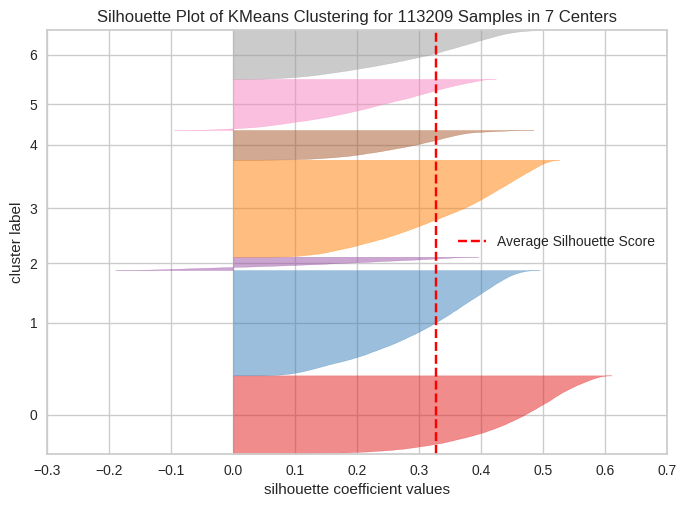

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113209 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
visualizer = SilhouetteVisualizer(kmeans_7)

visualizer.fit(df_std_final)
visualizer.poof()

In [66]:
df_std_final['cluster_7']= kmeans_7.labels_
df_std_final.head()

price  freight_value  Somme des achats  Nombre achats effectués  \
0  0.552922       0.115124          0.322325                -0.266884   
1  1.459203       1.668535          1.200094                -0.266884   
2  0.675079      -0.143146          0.440639                -0.266884   
3  0.749707       0.208581          0.512920                -0.266884   
4  1.212306       0.138489          0.960965                -0.266884   

   days_diff  Number_of_days_of_delay  review_score  payment_installments  \
0   1.512000                 0.108253     -0.024834             -0.340240   
1  -0.061751                 0.405554      0.696887              1.817199   
2  -0.891072                 1.297458      0.696887              1.457626   
3  -0.453556                -0.089948      0.696887             -0.699813   
4  -1.354708                 0.603755      0.696887              1.817199   

   cluster_7  
0          0  
1          6  
2          6  
3          1  
4          6

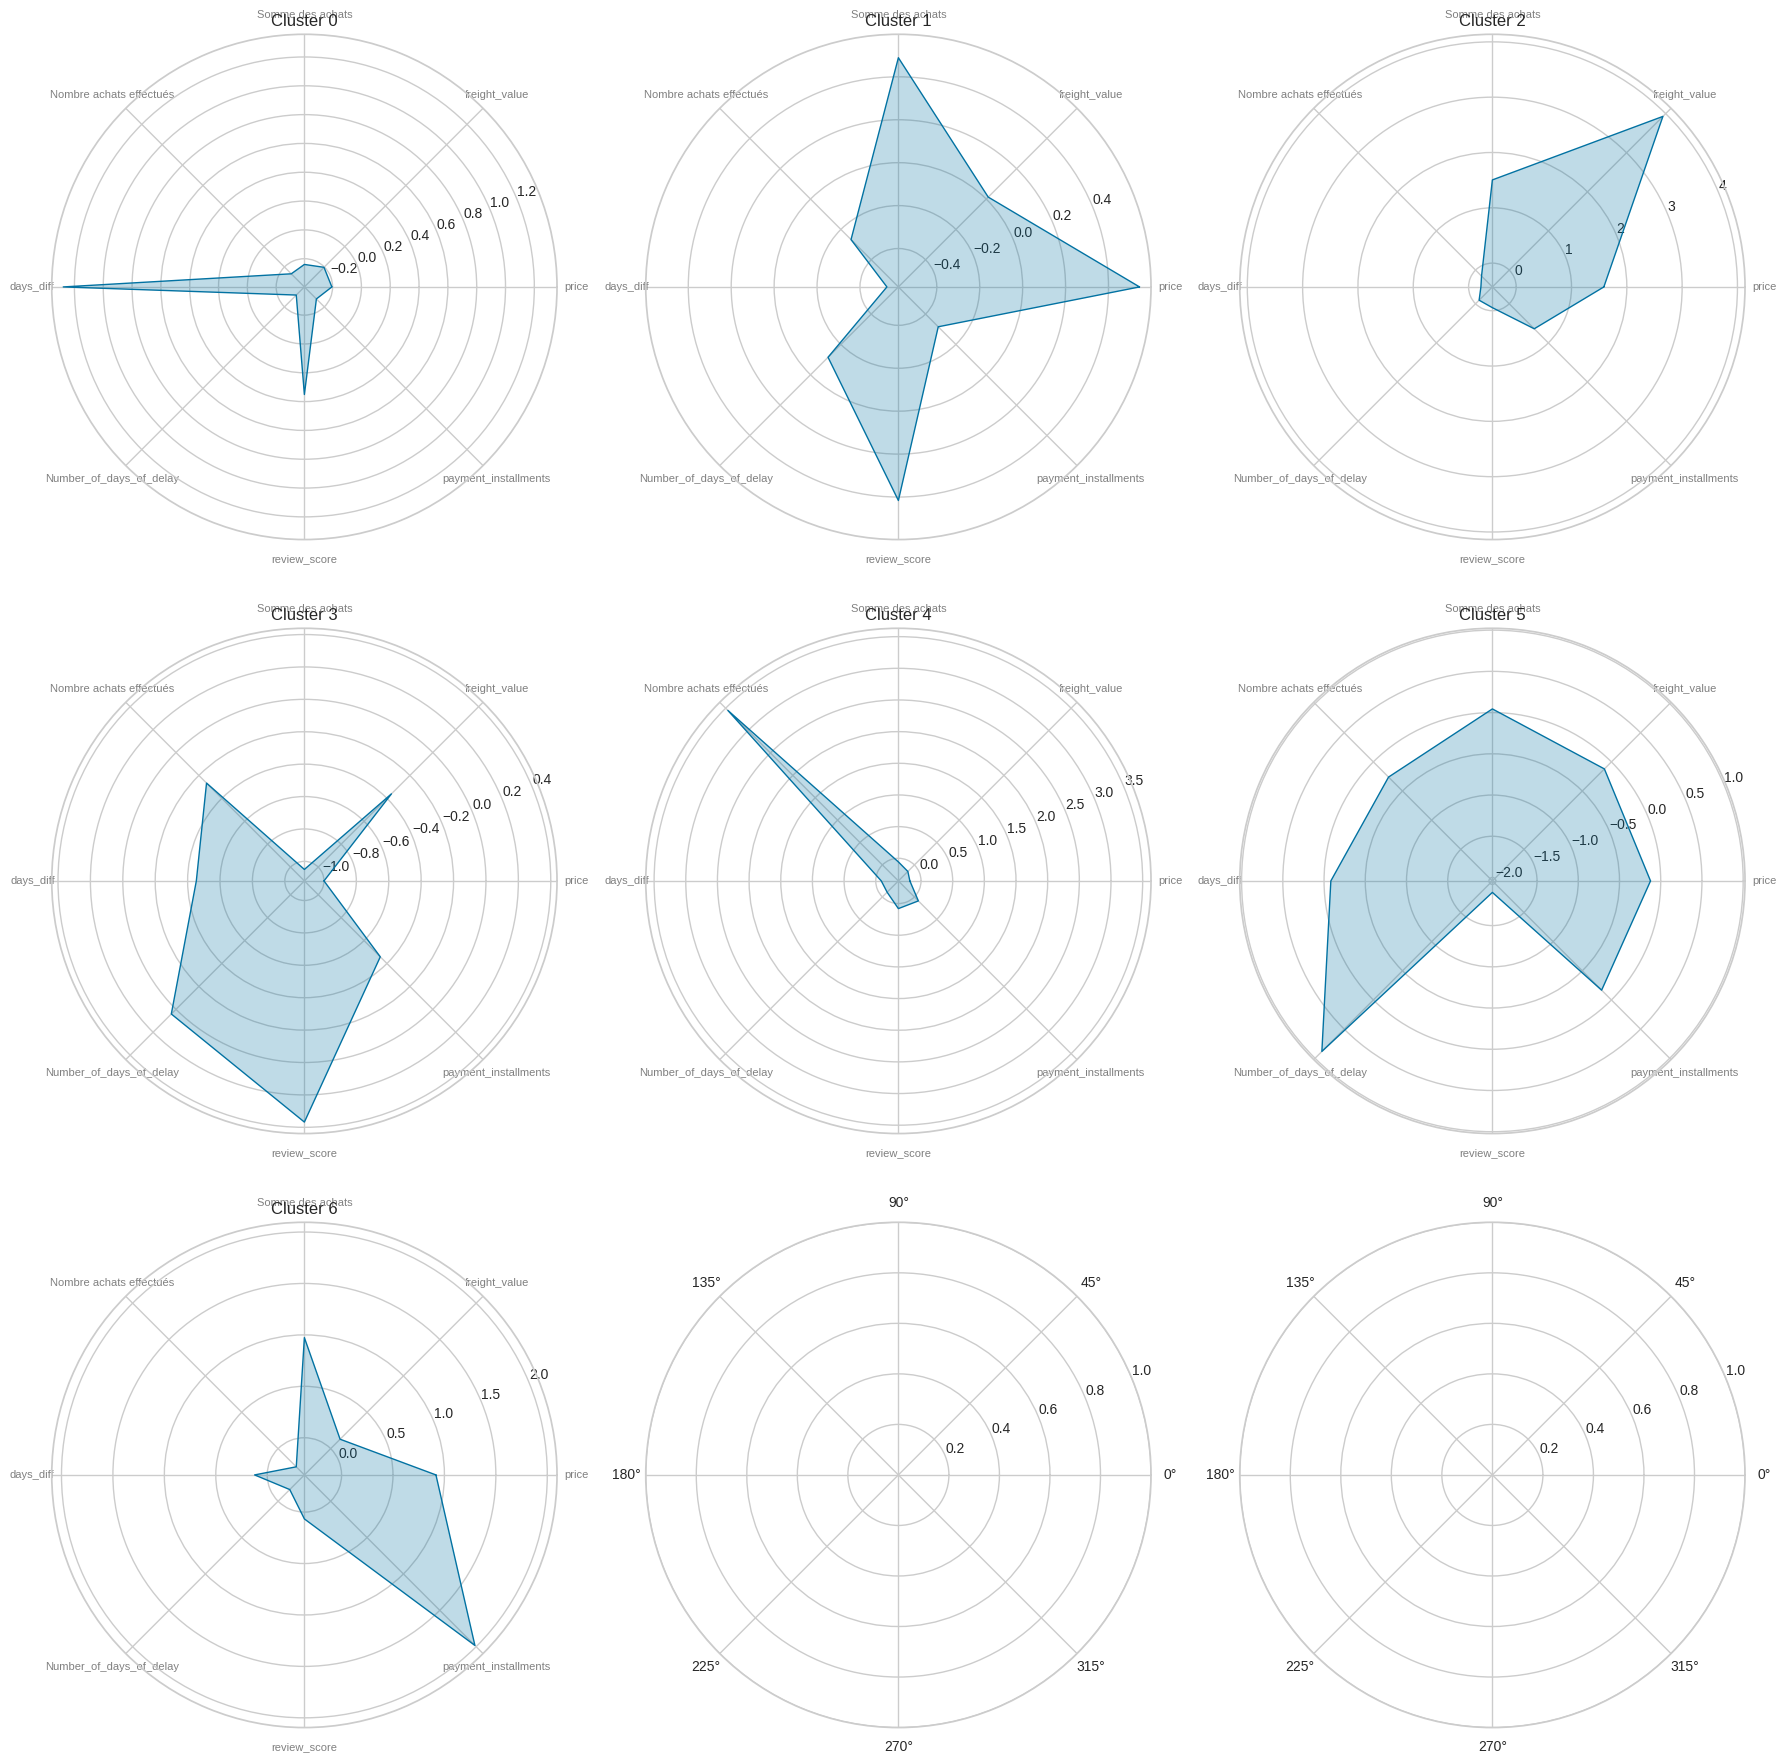

In [67]:
from math import pi

variables = ['price', 'freight_value','Somme des achats',
             'Nombre achats effectués','days_diff',
            'Number_of_days_of_delay','review_score','payment_installments']

cluster_means = df_std_final.groupby('cluster_7')[variables].mean().reset_index()

num_clusters = len(cluster_means)

def create_radar_charts(cluster_means, variables):
    num_vars = len(variables)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, axs = plt.subplots(3, 3, figsize=(18, 18), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_clusters):
        values = cluster_means.loc[i].drop('cluster_7').values.flatten().tolist()
        values += values[:1]

        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}')
        axs[i].fill(angles, values, alpha=0.25)
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)
        axs[i].set_title(f'Cluster {i}')

    plt.tight_layout()
    plt.show()

create_radar_charts(cluster_means, variables)

**df_test_3 : 5 clusters**

In [68]:
kmeans_test_3 =KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans_test_3.fit(df_test_3)

KMeans(n_clusters=5, n_init=10, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


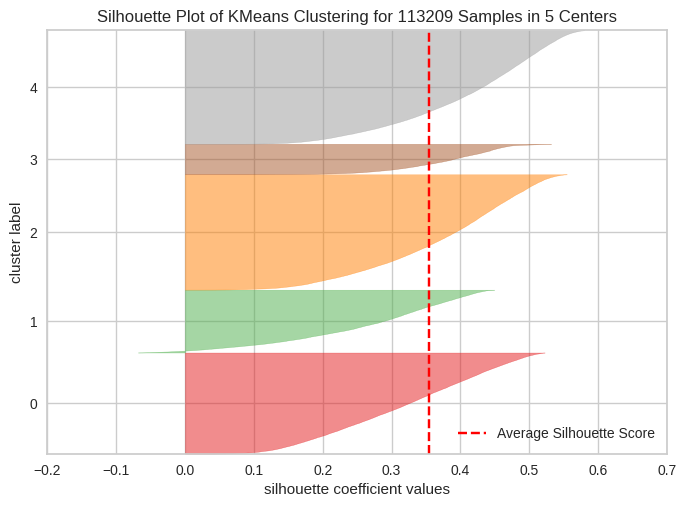

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113209 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
visualizer = SilhouetteVisualizer(kmeans_test_3)

visualizer.fit(df_test_3)
visualizer.poof()

**df_test_3 : 6 clusters**

In [70]:
k_means_test_3_bis =KMeans(n_clusters=6, random_state=42,n_init=10)
k_means_test_3_bis.fit(df_test_3_bis)

KMeans(n_clusters=6, n_init=10, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


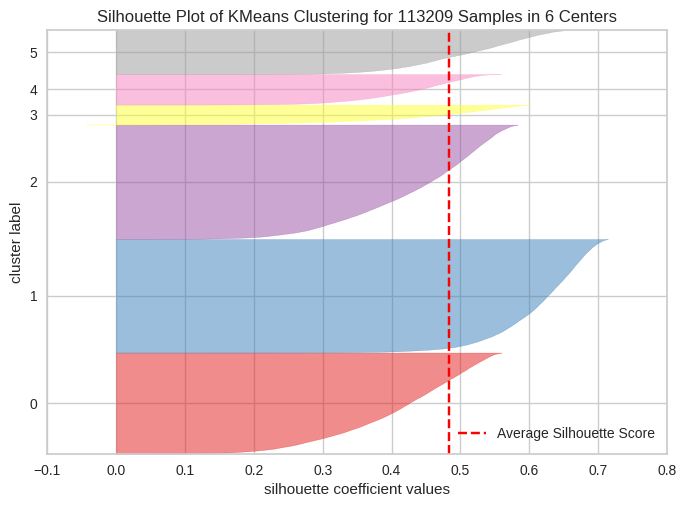

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 113209 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
visualizer=SilhouetteVisualizer(k_means_test_3_bis)

visualizer.fit(df_test_3_bis)
visualizer.poof()

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est un algorithme de clustering non supervisé qui regroupe des points de données proches en fonction de leur densité et identifie les points isolés comme du bruit.

Afin de réduire le temps utilisé par l'algorithme, j'ai décidé de ne prendre qu'un échantillon de 20000 clients, afin de montrer que la segmentation est possible à travers cet algorithme.

In [72]:
from sklearn.cluster import DBSCAN

df_dbscan = df_std_final.copy()
df_dbscan_sampled = df_dbscan.sample(n=20000, random_state=0)

Afin d'obtenir les paramètres les plus optimaux pour la segmentation, j'ai décidé d'utiliser le module ParameterGrid.

In [73]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score


param_grid = {'eps': [0.1, 0.5, 0.8, 1], 'min_samples': [5, 15, 25, 30]}

best_params = None
best_silhouette_score = -1

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan_labels = dbscan.fit_predict(df_dbscan_sampled)
    unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
    if len(unique_labels) > 1:  # Au moins un cluster autre que le bruit
        silhouette_avg = silhouette_score(df_dbscan_sampled, dbscan_labels)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = params

print("Hyperparamètres sélectionnés:", best_params)

Hyperparamètres sélectionnés: {'eps': 1, 'min_samples': 25}


In [74]:
dbscan = DBSCAN(eps= 1, min_samples= 25)
dbscan.fit(df_dbscan_sampled)
cluster_labels = dbscan.labels_

In [75]:
unique_labels = np.unique(cluster_labels[cluster_labels != -1])
num_clusters = len(unique_labels)

print("Number of clusters obtained:", num_clusters)

Number of clusters obtained: 6


Le nombre optimal obtenu de clusters est également de 6 pour cet algorithme.

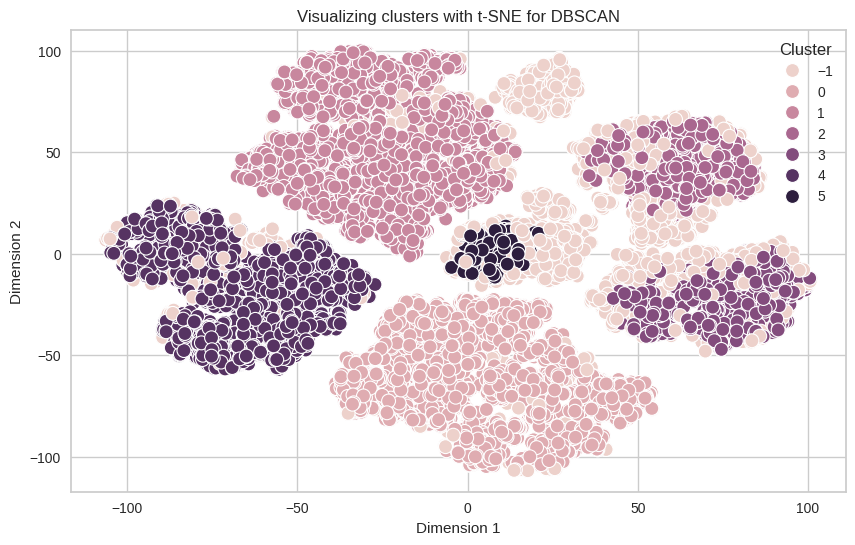

In [76]:
from sklearn.manifold import TSNE

dbscan = TSNE(n_components=2, random_state=0)
dbscan_data = dbscan.fit_transform(df_dbscan_sampled)
dbscan_df = pd.DataFrame({'Dimension 1': dbscan_data[:, 0], 'Dimension 2': dbscan_data[:, 1], 'Cluster': cluster_labels})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=dbscan_df, s=100)
plt.title('Visualizing clusters with t-SNE for DBSCAN')
plt.show()

Ce graphique représente une visualisation des clusters formés par l'algorithme DBSCAN, réduits à deux dimensions à l'aide de t-SNE. On observe plusieurs clusters distincts, chacun étant bien séparé, ce qui indique que DBSCAN a réussi à identifier des groupes de points de données avec des densités similaires, tandis que les points marqués comme "-1" sont considérés comme du bruit ou des outliers.

In [77]:
n_noise_ = list(cluster_labels).count(-1)
print('Estimated number of noise points:', n_noise_)

Estimated number of noise points: 3713


Il y a donc 3713 points considérés comme du bruit, ce qui représente environ 18% du jeu de données utilisé.

In [78]:
dbscan_df['Cluster'].value_counts()

Cluster
 1    4658
 0    4399
-1    3713
 4    3435
 3    1689
 2    1524
 5     582
Name: count, dtype: int64

### Classification Ascendante Hiérarchique

La Classification Ascendante Hiérarchique (CAH) est une méthode d'apprentissage non supervisée qui est utilisée pour regrouper des objets en grappes (clusters) en fonction de leur similarité. Elle est considérée comme une classification ascendante car elle commence par traiter chaque objet comme une grappe individuelle, puis fusionne progressivement les grappes les plus similaires jusqu'à ce que toutes les données soient regroupées au sein d'une seule grappe.

In [79]:
df_cah=df_final_merged_7.copy()
df_cah = df_cah.sample(n=20000, random_state=0)
df_cah=df_cah.set_index('customer_unique_id')
df_cah_bis=df_cah.loc[:,['price', 'freight_value','Somme des achats',
             'Nombre achats effectués','days_diff',
'review_score','payment_installments']]
df_cah_bis = df_cah_bis.apply(np.log1p) #SEULEMENT GARDER LES VALEURS NUMERIQUES UTILISES POUR LA CLASSIFICATION : recency	frequency	monetary	total_items	average_installments	freight	average_delivery_delay	average_revie
df_cah_bis.head(1)

price  freight_value  Somme des achats  \
customer_unique_id                                                            
ac3535b87084628fab1d655998d12eca  4.941642       2.912894          5.631212   

                                  Nombre achats effectués  days_diff  \
customer_unique_id                                                     
ac3535b87084628fab1d655998d12eca                 0.693147   5.446737   

                                  review_score  payment_installments  
customer_unique_id                                                    
ac3535b87084628fab1d655998d12eca      1.791759              0.693147

In [80]:
variables = df_cah_bis.values
variables

array([[4.94164242, 2.912894  , 5.63121178, ..., 5.44673737, 1.79175947,
        0.69314718],
       [2.98416564, 2.8786365 , 3.65169666, ..., 5.44241771, 1.79175947,
        2.07944154],
       [3.71332813, 2.83966309, 5.08115589, ..., 5.6347896 , 1.38629436,
        0.69314718],
       ...,
       [5.19295685, 3.00221124, 5.19295685, ..., 4.75359019, 0.69314718,
        1.09861229],
       [5.24702407, 3.18841662, 5.24702407, ..., 3.98898405, 1.79175947,
        2.39789527],
       [4.15543966, 2.72063732, 4.15543966, ..., 5.45958551, 1.79175947,
        0.69314718]])

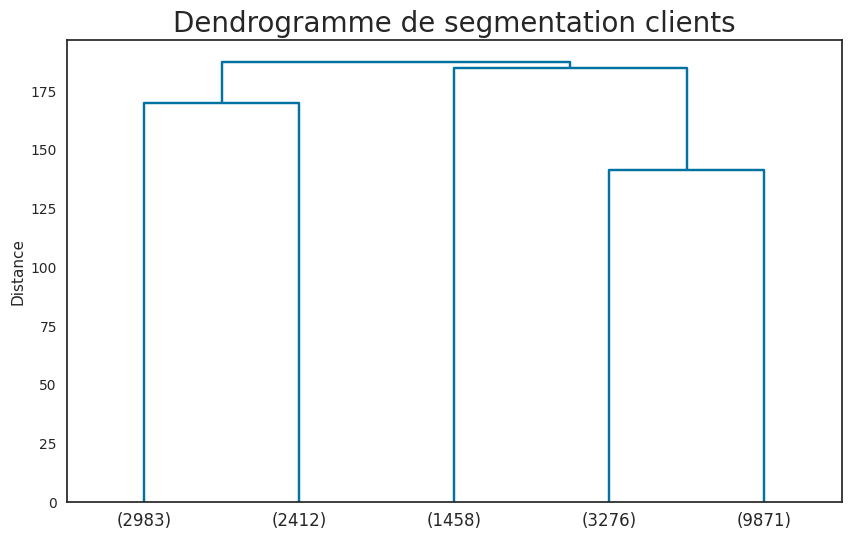

In [81]:
variables = df_cah_bis.values
liste_id = df_cah_bis.index

from sklearn import preprocessing

variables_standard = preprocessing.StandardScaler().fit(variables)
variables_echelle = variables_standard.transform(variables)

from scipy.cluster.hierarchy import linkage, fcluster

link_variables = linkage(variables_echelle, method = 'ward', metric='euclidean')

from scipy.cluster.hierarchy import dendrogram

fig =plt.figure(figsize=(10,6))
sns.set_style('white')
plt.title('Dendrogramme de segmentation clients', fontsize=20)
plt.ylabel('Distance')
dendrogram(link_variables, labels = df_cah_bis.index, p=5, truncate_mode='lastp', orientation='top')
plt.show()

In [83]:
classe = fcluster(link_variables, t=5, criterion='maxclust')
df_final_cah = pd.DataFrame({'customer_unique_id' : df_cah_bis.index.tolist(),
                             'classe' : classe})
df_final_cah = df_final_cah.sort_values(['classe', 'customer_unique_id'])

df_final_cah = pd.merge(df_cah_bis, df_final_cah, on='customer_unique_id')
df_final_cah.head(1)

customer_unique_id     price  freight_value  \
0  ac3535b87084628fab1d655998d12eca  4.941642       2.912894   

   Somme des achats  Nombre achats effectués  days_diff  review_score  \
0          5.631212                 0.693147   5.446737      1.791759   

   payment_installments  classe  
0              0.693147       5

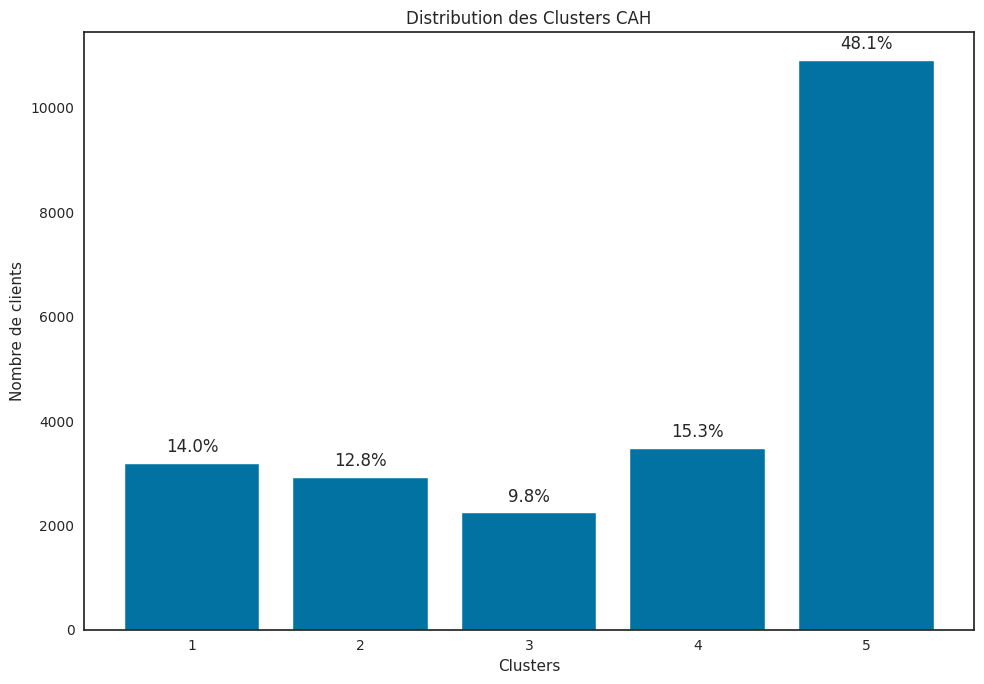

In [84]:
segment_counts = df_final_cah['classe'].value_counts()

plt.figure(figsize=(10, 7))
plt.bar(segment_counts.index, segment_counts.values)  # Create the bar chart

# Add percentages on top of the bars
total = segment_counts.sum()
for cluster, count in segment_counts.items():  # Iterate using items()
    percentage = '{:.1f}%'.format(100 * count / total)
    plt.text(cluster, count + 0.01 * total, percentage, ha='center')
plt.xlabel('Clusters')  # Label for the x-axis
plt.ylabel('Nombre de clients')  # Label for the y-axis
plt.title('Distribution des Clusters CAH')  # Title of the histogram
plt.tight_layout()

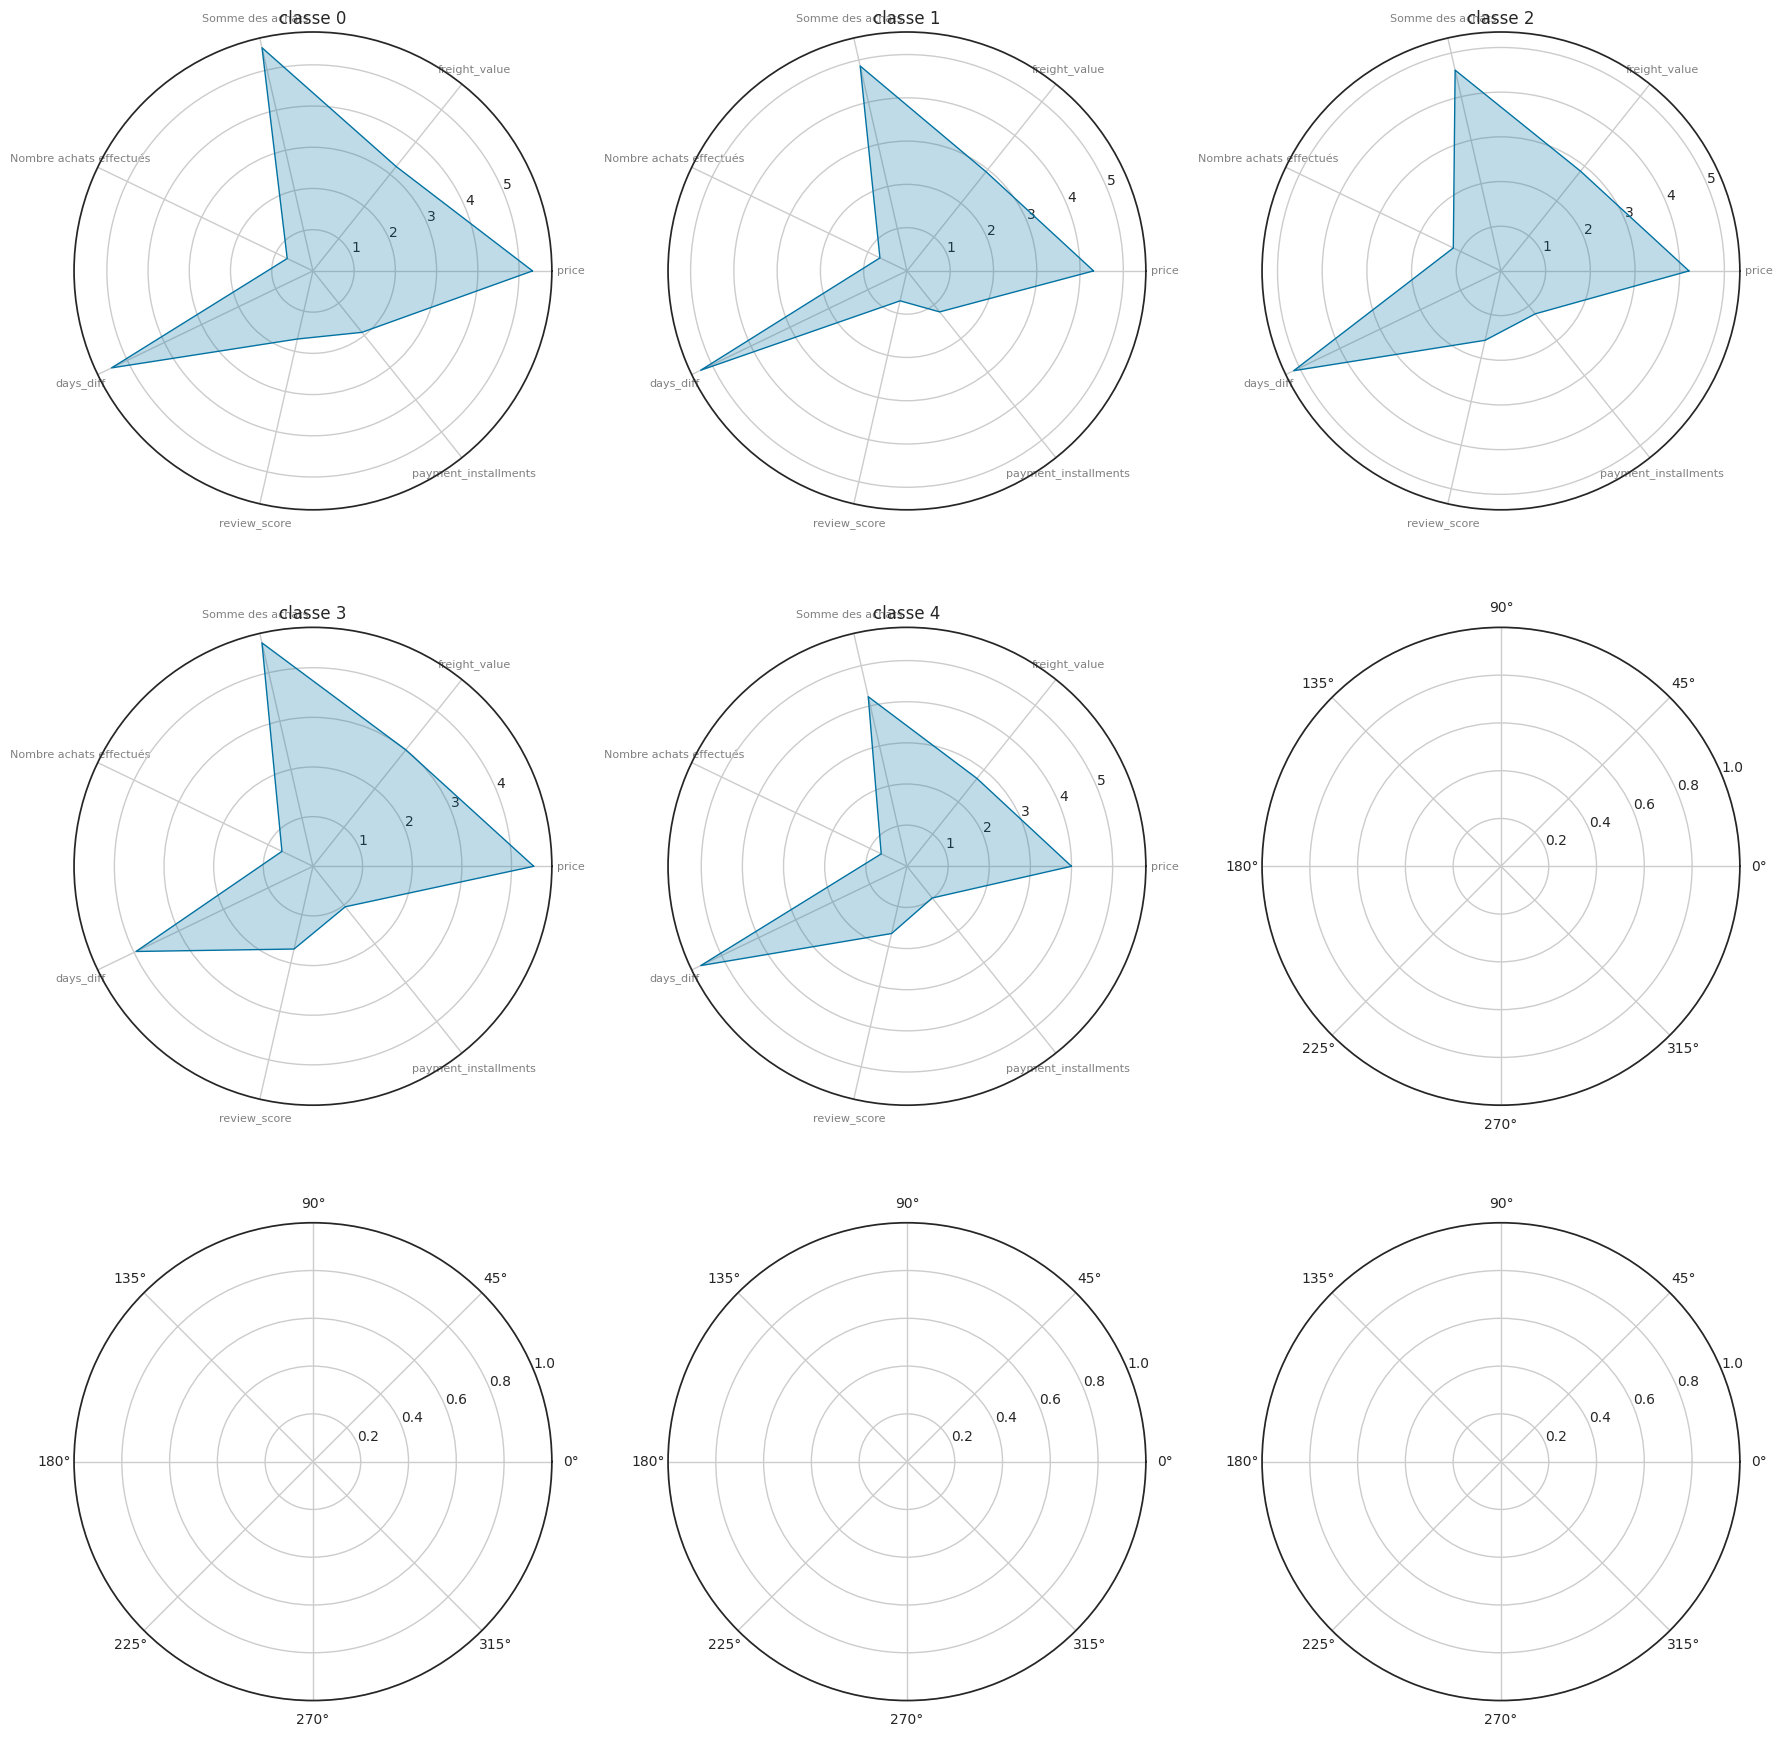

In [85]:
from math import pi

# Calculer les moyennes des variables par classe
variables = ['price', 'freight_value','Somme des achats',
             'Nombre achats effectués','days_diff',
'review_score','payment_installments']

classe_means = df_final_cah.groupby('classe')[variables].mean().reset_index()

# Nombre de classes
num_classes = len(classe_means)

# Créer un radar plot pour chaque classe
def create_radar_charts(classe_means, variables):
    # Nombre de variables
    num_vars = len(variables)

    # Angles pour chaque variable
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialiser le radar plot
    fig, axs = plt.subplots(3, 3, figsize=(18, 18), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i in range(num_classes):
        values = classe_means.loc[i].drop('classe').values.flatten().tolist()
        values += values[:1]

        # Tracer les valeurs pour le classe
        axs[i].plot(angles, values, linewidth=1, linestyle='solid', label=f'classe {i}')
        axs[i].fill(angles, values, alpha=0.25)

        # Ajouter les labels pour chaque angle
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(variables, color='grey', size=8)

        # Ajouter un titre
        axs[i].set_title(f'classe {i}')

    # Ajuster l'affichage
    plt.tight_layout()
    plt.show()

# Créer et afficher les radar plots dans le même visuel
create_radar_charts(classe_means, variables)